# EDA + Cleaning of the dataset.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pylab
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('ggplot')
pd.set_option('max_columns',100)

In [3]:
df_train = pd.read_csv('./data/train.csv')

## Total number of variables

In [4]:
#Visualize every column in here
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Get list of categorical and numerical columns.
cate = [col for col in df_train.columns if df_train[col].dtype not in ['int64','float64']]
num = [col for col in df_train.columns if df_train[col].dtype in ['int64','float64']]

#Print statement of number of features.
print('There are a total of {} columns, {} categorical and {} numerical.'.format(len(df_train.columns),len(cate),len(num)))

There are a total of 81 columns, 43 categorical and 38 numerical.


In [6]:
#Visualizing the null values.
null_cols = [col for col in df_train.columns if df_train[col].isnull().any()==True]
num_nulls = [sum(df_train[col].isnull())/len(df_train) for col in df_train.columns if df_train[col].isnull().any()==True]
pd.DataFrame({'column':null_cols, 'percent_null':num_nulls}).sort_values('percent_null')

,column,percent_null
9,Electrical,0.000685
2,MasVnrType,0.005479
3,MasVnrArea,0.005479
4,BsmtQual,0.025342
5,BsmtCond,0.025342
7,BsmtFinType1,0.025342
6,BsmtExposure,0.026027
8,BsmtFinType2,0.026027
15,GarageCond,0.055479
14,GarageQual,0.055479


In [7]:
#Numerical Null values
num_nulls = [col for col in num if df_train[col].isnull().any()==True]
print('Numerical columns with null values are: ', num_nulls)

Numerical columns with null values are:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [8]:
#Numerical Null values
cate_nulls = [col for col in cate if df_train[col].isnull().any()==True]
print('Categorical columns with null values are: ', cate_nulls)

Categorical columns with null values are:  ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## Filling out null values.
### Numerical variables

As shown above, GarageYrBlt, MasVnrArea, and LotFrontage have missing values. Let's try filling them in.

##### MasVnrArea - Masonry veneer area in square feet

In [9]:
df_train['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [10]:
df_train[df_train['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


More than half of the values included are 0.0. Thus, it's reasonable to assume that the 8 missing values would have 0.0 as well if they had been recorded. Which makes sense, since a null MasVnrArea likely means that there wasn't a Masonry Veneer, and thus is equal to a MasVnrArea of 0.

In [11]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0.0)

##### LotFrontage - Linear feet of street connected to property

In [12]:
df_train[df_train['LotFrontage'].isnull()].sample(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
147,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
1346,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,262500
269,270,20,RL,NaN,7917,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2007,WD,Normal,148000
1348,1349,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,215000
360,361,85,RL,NaN,7540,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,156000
1030,1031,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,160000
900,901,20,RL,NaN,7340,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,110000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
186,187,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,173000
539,540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000


In [13]:
df_train['LotFrontage'].value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

The distribution for this column is more even compared to MasVnrArea. Thus, it is not appropriate to fill in using the most common value. 

Looking at a sample of rows with null values in LotFrontage, looks like a lot of them contain null values for Alley (Type of alley access to property) as well. This seems to suggest that these houses don't have access to the street, and would need to be filled in with 0.

In [14]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

##### GarageYrBlt - Year garage was built

In [15]:
df_train['GarageYrBlt'].value_counts().head()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
Name: GarageYrBlt, dtype: int64

GarageYearBlt has a plausible reason for having Nan values - it is likely that those houses didn't have a garage. Let's confirm this. 

In [16]:
df_train[df_train['GarageYrBlt'].isnull()].sample(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
562,563,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,108000
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
1283,1284,90,RL,94.0,9400,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,139000
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
528,529,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,86000
386,387,50,RL,58.0,8410,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,AdjLand,81000
1234,1235,70,RH,55.0,8525,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Abnorml,130000
1407,1408,20,RL,0.0,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
140,141,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,106250


It looks like for rows where GarageYrBlt is null, GarageQual and GarageFinish are null also. This would suggest that our conjecture is correct. 

We're going to split the info in GarageYrBlt into two columns: one indicating the presence of a garage ("HasGarage") and another the difference in years between when the house was built and when the garage was built("DiffHouseGarageYrs").

In [17]:
df_train['HasGarage'] = df_train['GarageYrBlt'].notnull()
df_train['DiffHouseGarageYrs'] = df_train['GarageYrBlt'] - df_train['YearBuilt']
df_train['DiffHouseGarageYrs'] = df_train['DiffHouseGarageYrs'].fillna(0)

Let's take a look at the new columns that we have created. 

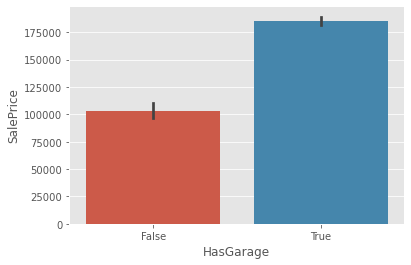

In [30]:
#HasGarage
sns.barplot(x='HasGarage',y='SalePrice',data=df_train)
plt.show()

Looks like houses with a garage sells for significantly more compared to those without, which is not surprising.

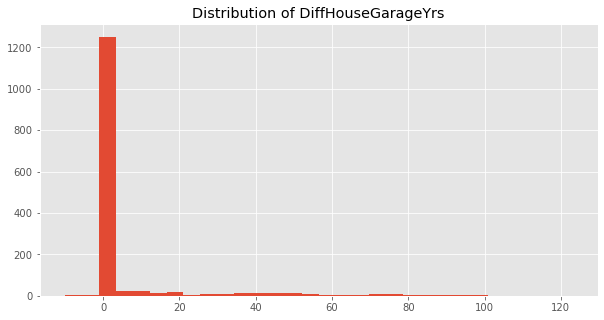

In [31]:
#DiffHouseGarageYrs
plt.figure(figsize=(10,5))
plt.hist(df_train['DiffHouseGarageYrs'],bins=30)
plt.title('Distribution of DiffHouseGarageYrs')
plt.show()

So there's a lot of zeroes in the histogram. Let's remove the zeros, and see what remains and its relationship with the dependent variable.

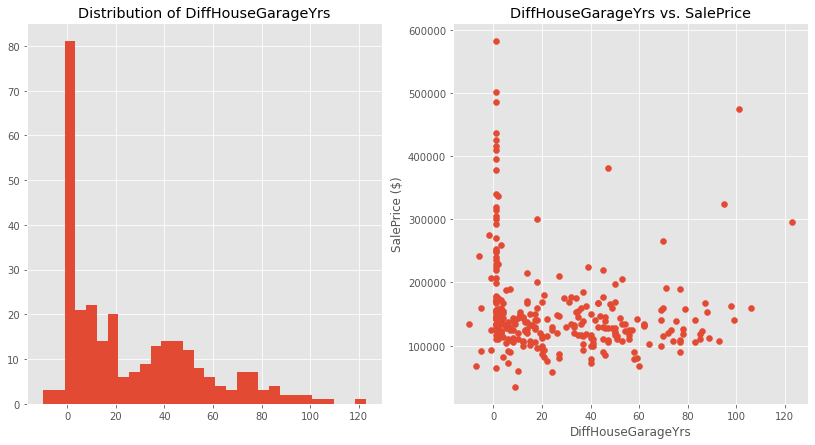

In [32]:
diff_no_zeros = df_train[df_train['DiffHouseGarageYrs']!=0]

plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.hist(diff_no_zeros['DiffHouseGarageYrs'],bins=30)
plt.title('Distribution of DiffHouseGarageYrs')

plt.subplot(1,2,2)
plt.scatter(diff_no_zeros['DiffHouseGarageYrs'],diff_no_zeros['SalePrice'])
plt.title('DiffHouseGarageYrs vs. SalePrice')
plt.xlabel('DiffHouseGarageYrs')
plt.ylabel('SalePrice ($)')
plt.show()

The histogram reveals three different concentrations for the difference in number of years between the build of a house and its garage-- 0-20, 30-50, 70-80, with an extraordinarily high concentration immediately after 0. Ignoring the large number of DiffHouseGarageYrs near 0, the variable also seems to have a positive linear relationship with SalePrice.

In [21]:
diff_no_zeros['DiffHouseGarageYrs'].value_counts()

 1.0      52
 2.0      16
 3.0      10
 4.0       7
 8.0       7
          ..
 42.0      1
-2.0       1
 88.0      1
 123.0     1
 71.0      1
Name: DiffHouseGarageYrs, Length: 87, dtype: int64

1 is a very popular number after 0, which does make sense. 

Houses with DiffGarageYrs equal to 1 have a wide range of SalePrice in the above scatterplot, but generally DiffHouseGarageYrs is positively correlated with the dependent variable. However, it doesn't seem to be a very large slope. 

There seem to be some outliers. Maybe a transformation will fix that.

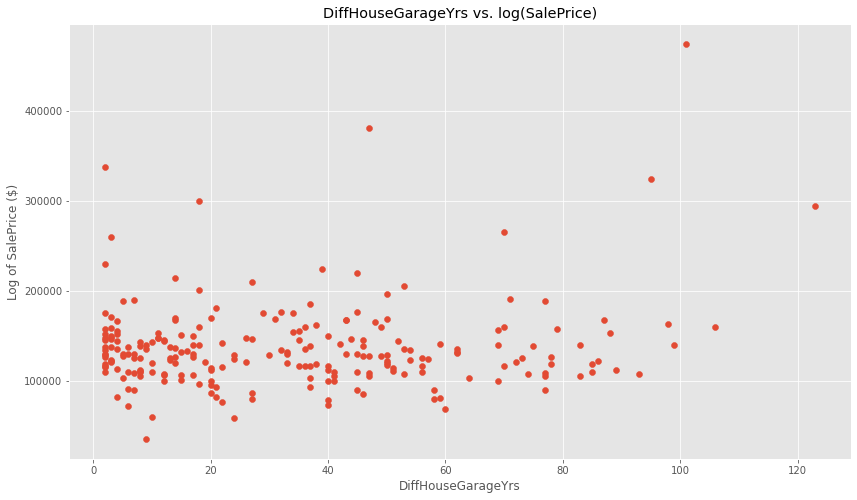

In [36]:
plt.figure(figsize=(14,8))

plt.scatter((diff_low['DiffHouseGarageYrs']),(diff_low['SalePrice']))
plt.title('DiffHouseGarageYrs vs. log(SalePrice)')
plt.xlabel('DiffHouseGarageYrs')
plt.ylabel('Log of SalePrice ($)')
plt.show()

### Categorical Variables

As with the numerical variables, we'll begin by filling in all missing values in the columns.

Reading the documentation, I noticed a common pattern for all of these columns aside from "Electrical": null values are said to mean that the variable is not applicable for the house. Thus, I filled these nulls with the string 'None'.

In [37]:
for col in cate_nulls:
    if col != 'Electrical':
        df_train[col] = df_train[col].fillna('None')

Notably, a few of these ('FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC') are really numerical measurements and should be converted. I will do so later. But right now we're focused on filling in missing values.

As for "Electrical", let's take a look at the problematic row. 

In [42]:
df_train[df_train['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage,DiffHouseGarageYrs
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500,True,1.0


As we can see from below, this column is predominantly one value. There doesn't seem to be anything particularly special about the row with the missing data, so it's reasonable to assume that it would have the same value as the majority.

In [43]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

# More in depth examination of the variables.

To begin with, let's take a look at our dependent variable.

### Examining our target variable (SalePrice)

To begin with, let's look at the target variable, examining both its summary statistics and plotting it in a boxplot and histogram.

In [45]:
#Look at the information in describe
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

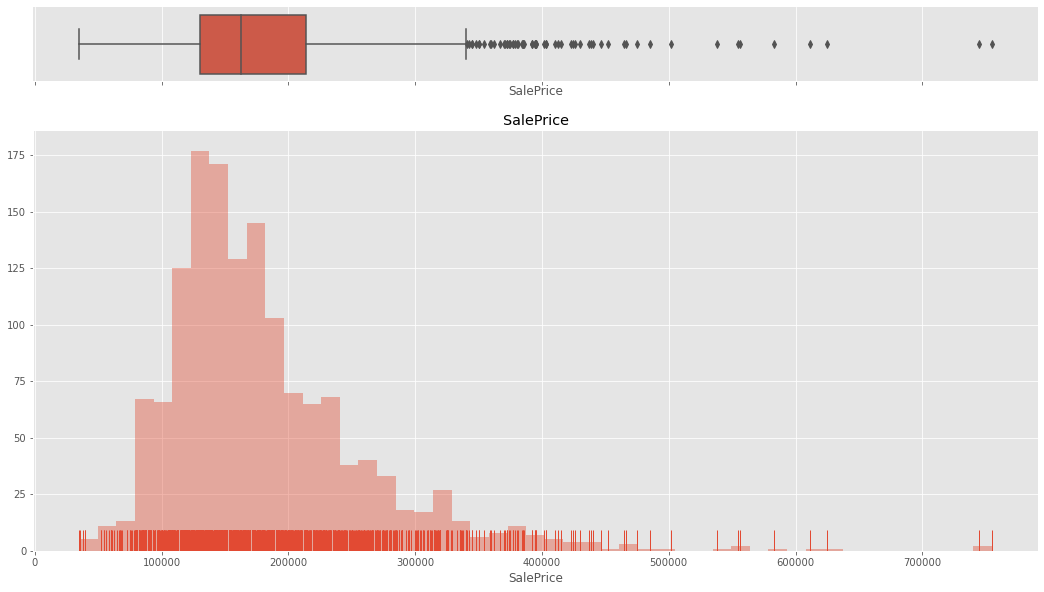

In [46]:
#Plot the Target Variable in boxplot + histogram and rug plot.
x = df_train['SalePrice']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(18,10))
sns.boxplot(x, ax=ax_box)
plt.title('SalePrice')
sns.distplot(x, ax=ax_hist, kde=False, rug=True, norm_hist=False)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()

Looks like the data is skewed to the right. Let's look at its kurtosis and skew.

In [47]:
#Ideally both should be zero.
df_train['SalePrice'].kurt()

6.536281860064529

In [48]:
#Ideally both should be zero.
df_train['SalePrice'].skew()

1.8828757597682129

The values confirm what I thought, which is that the distribution is not normal. Let's prove this using 1) The QQ plot, and 2)The D'Agostino test. Since our sample is >20 (1400 something), it satisfies the requirements for 2).

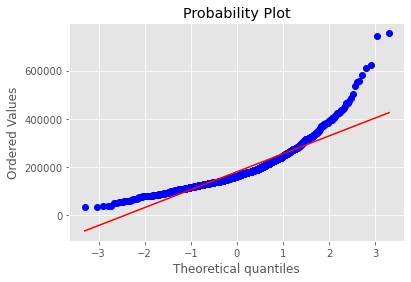

In [49]:
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

In [50]:
#Definitely doesn't follow a straight line.
f, p = stats.normaltest(x)
"The p-value of the D'Agostino test for normalcy is %.3f , with an alpha of 0.05" % p 

"The p-value of the D'Agostino test for normalcy is 0.000 , with an alpha of 0.05"

So the SalePrice is not normal in our data. Below I took the natural log of it, and see if tht changed anything.

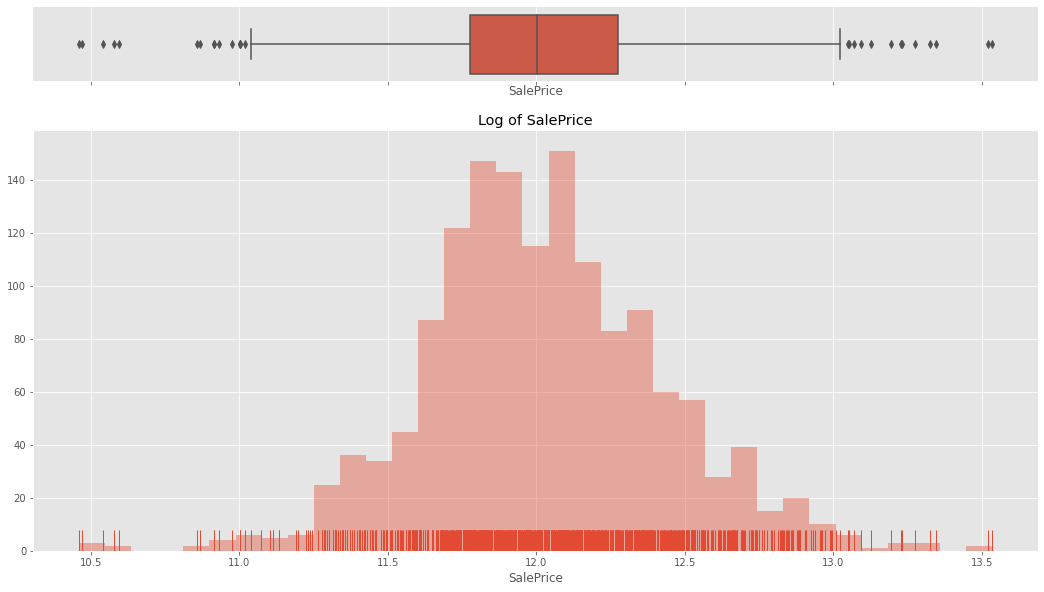

In [51]:
#Boxplot + Histogram
x = np.log(df_train['SalePrice'])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(18,10))
sns.boxplot(x, ax=ax_box)
plt.title('Log of SalePrice')
sns.distplot(x, ax=ax_hist, kde=False, rug=True, norm_hist=False)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()

It certainly looks more normal now, even though there are outliers to both sides. Is it normal, though?

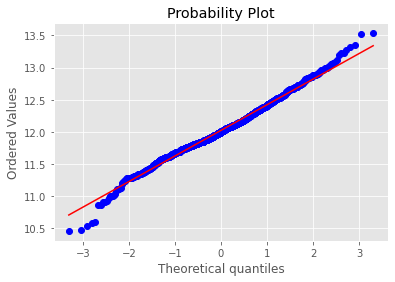

In [52]:
#Normality test and QQ plot
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

In [53]:
f, p = stats.normaltest(x)
stmt = """The kurtosis of log(SalePrice) is %.3f, the skew is %.3f, and The p-value of the D'Agostino test for normalcy is %.3f ,
with an alpha of 0.05.""" % (x.kurt(), x.skew(), p)
print(stmt)

The kurtosis of log(SalePrice) is 0.810, the skew is 0.121, and The p-value of the D'Agostino test for normalcy is 0.000 ,
with an alpha of 0.05.


No. Perhaps a stronger transformation is needed. Or we need to remove some outliers.

### Looking at the remaining variables.
I separated all of the remaining variables into several groups. For each group, I'll view the variables' relationships with SalePrice (Barplot for categorical, Scatterplot for numerical), as well any relationship between the variable that may be going on. I'll make some simple conversions and observations, and perhaps some simple feature extraction.

To start with, I will define a function that enables me to draw graphs more quickly.

In [54]:
#Plots variables again SalePrice
def draw_cols(cols, log=False):
    n_rows = len(cols)//2 + 1
    plt.figure(figsize=(16,7*n_rows))
    if log == True:
        target = np.log(df_train['SalePrice'])
    else:
        target = (df_train['SalePrice'])
    for i in range(len(cols)):
        #Create subplots
        plt.subplot(n_rows,2,i+1)
        #Numerical variables
        if df_train[cols[i]].dtype in ['int64','float64']:
            plt.scatter(df_train[cols[i]],target)
            plt.xlabel(cols[i])
            plt.ylabel('SalePrice')
        else:
            #Categorical variables
            barplot = sns.barplot(y=target,x=df_train[cols[i]])
            [item.set_rotation(45) for item in barplot.get_xticklabels()]
    plt.show()

## "Subjective" overall measurements of the house.

In [59]:
cols = ['OverallQual','OverallCond','ExterQual','ExterCond','Functional']

To begin with, while ExterQual and ExterCond appear categorical, they're really numerical measurements. For example, the description for ExterQual appears below:
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
     
This really is a scale measurement, ranging from Poor to Excellent. Thus, I converted columns with these "categorical" measurements to numerical, with 0 being none present, 1 being Poor, and 4 being excellent.

In [56]:
external_d = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df_train['ExterQual'] = df_train['ExterQual'].map(external_d)
df_train['ExterCond'] = df_train['ExterCond'].map(external_d)

The same can be said for the "Functional" column also. The description appears below; like ExterQual and ExterCond shown above, it is a scale, ranging from Typical Functionality to Salvage only.

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
    
0 will be Typical, and 7 will be salvage only. I expect this variable to have a negative correlation with the dependent variable.

In [57]:
functional_d = {'Typ':0, 'Min1':1, 'Maj1':4, 'Min2':2, 'Mod':3, 'Maj2':5, 'Sev':6}
df_train['Functional'] = df_train['Functional'].map(functional_d)

Let's do the analysis with the modified columns.

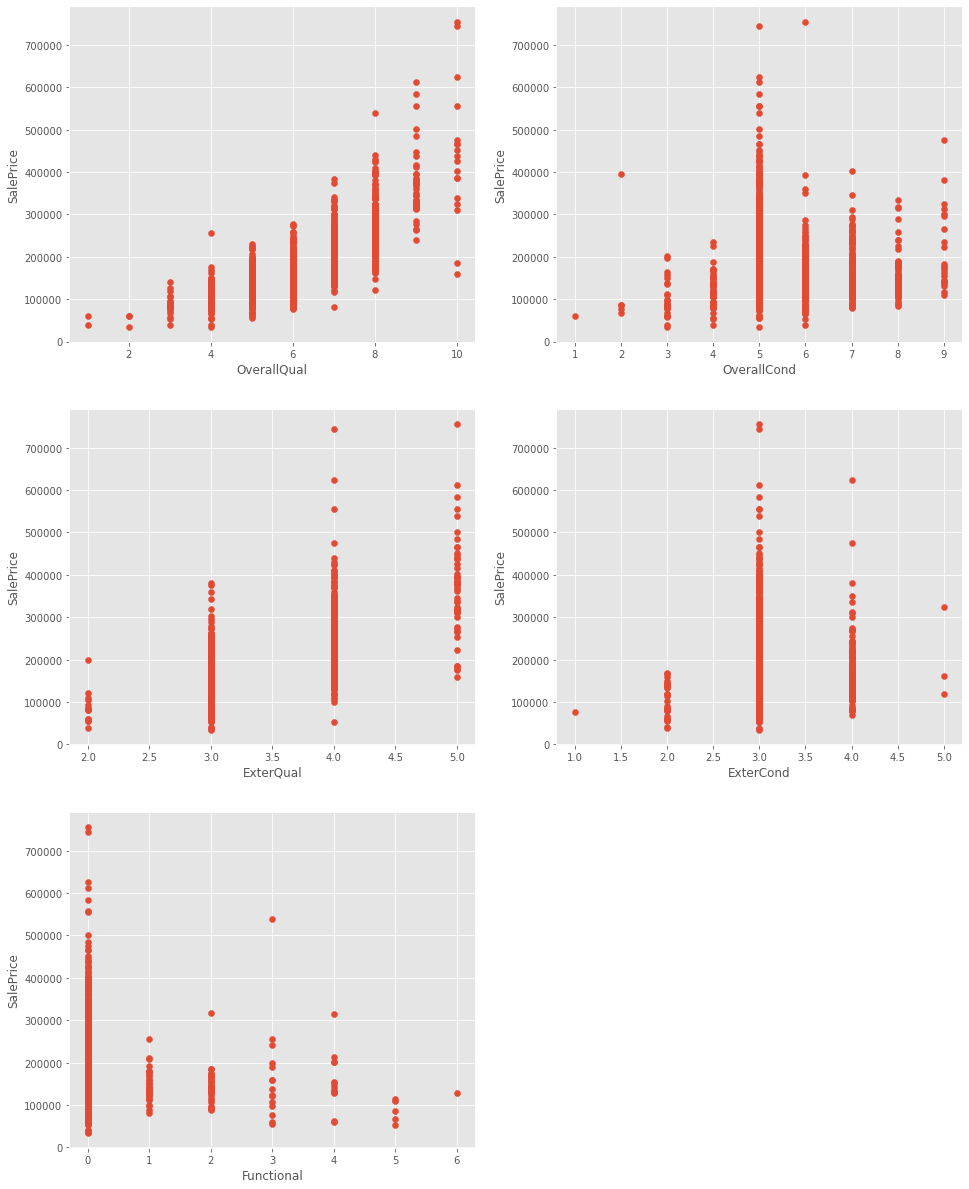

In [60]:
draw_cols(cols)

OverallQual, ExterQual, and Functional were all to our expectations. However, the linear relationship SalePrice has with ExterCond and OverallCond was not as obvious as one'd expect. Why would this be the case? 

Probably because the middle in both variables represent "average", and while not being in bad condition would increase the price, there are many other factors at play when it comes to the price of the house. This makes me wonder about their importance as variables, though.

I wonder if there's a linear relationship between ExterQual vs OverallQual, likewise between ExterCond and OverallCond.

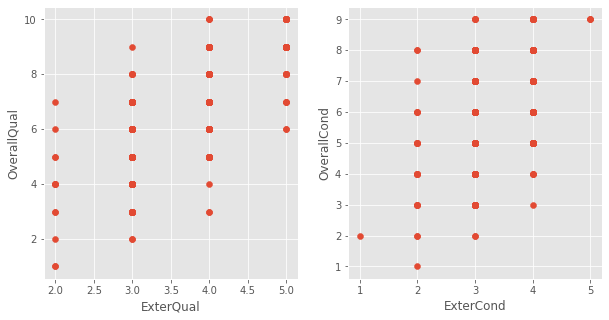

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(df_train['ExterQual'],df_train['OverallQual'])
plt.xlabel('ExterQual')
plt.ylabel('OverallQual')

plt.subplot(1,2,2)
plt.scatter(df_train['ExterCond'],df_train['OverallCond'])
plt.xlabel('ExterCond')
plt.ylabel('OverallCond')

plt.show()

So looks like there is a relationship, but not entirely linear. For example, in ExterQual vs OverallQual, higher ExterQual generally correlated with higher OverallQual, but with ExterQual = 1 the OverallQual ranged from 0 to 7. Looks like other factors determine OverallQual aside from ExterQual.


## Properties of the sale itself.

In [62]:
cols = ['MoSold','YrSold','SaleType','SaleCondition']

MoSold and YrSold are really categorical variables, even though they have numbers in them. Thus, I will convert them to such before plotting them.

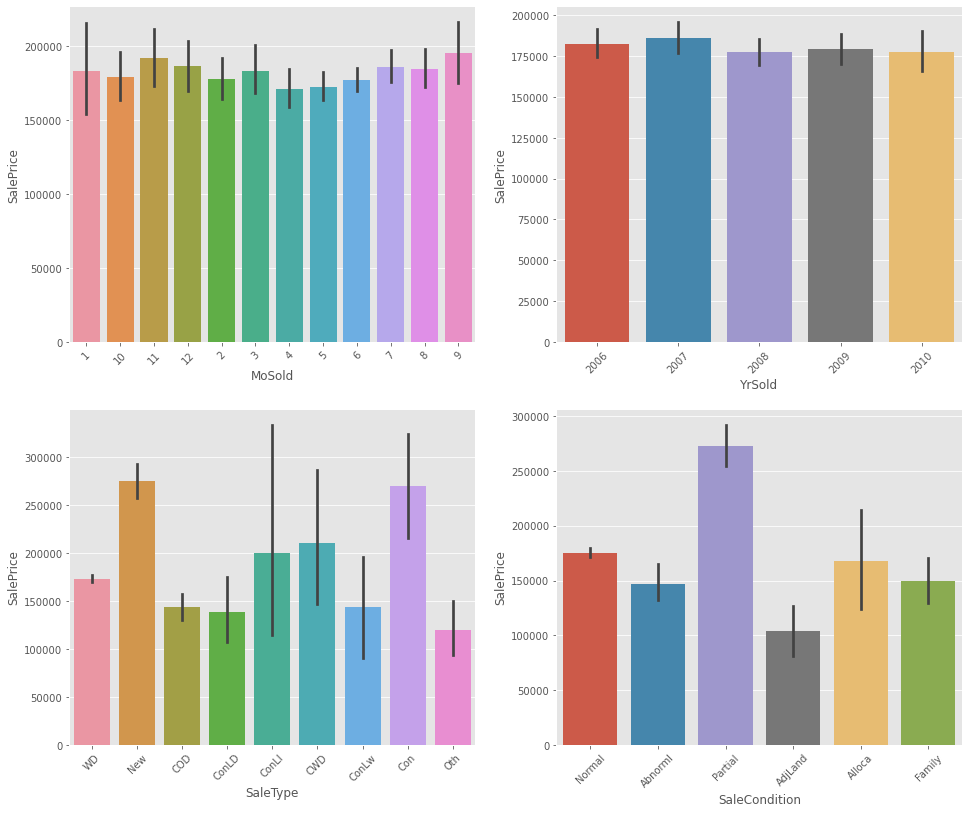

In [80]:
df_train['MoSold'] = df_train['MoSold'].astype('str')
df_train['YrSold'] = df_train['YrSold'].astype('str')
draw_cols(cols)

Judging from the graphs above, the month and year of the sale have no significant impact on the house's price. I wonder, though, if I can find any time-series based indicators by converting the Year and Month to datetime. 

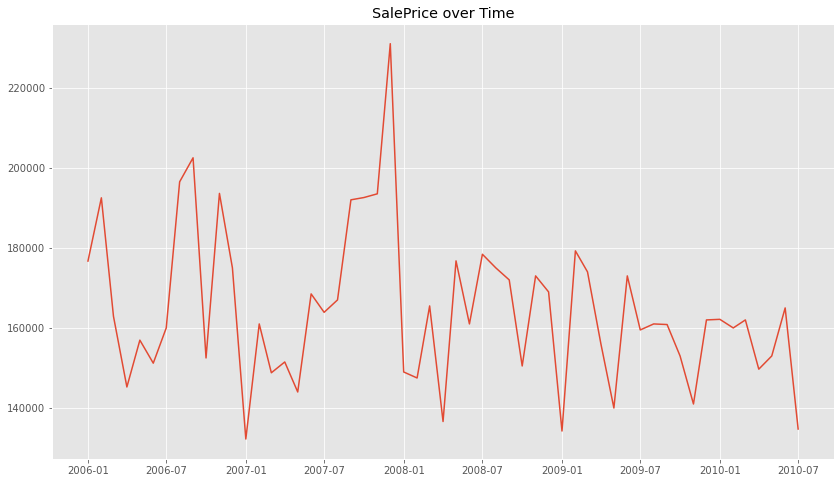

In [84]:
date_sold = df_train['YrSold'] + '-' + df_train['MoSold']
date_sold = pd.to_datetime(date_sold,format='%Y-%m')

plt.figure(figsize=(14,8))
plt.title('SalePrice over Time')
plt.plot(df_train['SalePrice'].groupby(date_sold).median())
plt.show()

Looks like there are some cyclic behaviours-- prices tend to go low around spring and up near winter -- which are captured by the barplots above. 

However, SalePrice is higher at around the winter of 2007 (Between 2007-07 and 2008-01) and was lower after 2008-07. Perhaps this is related with the <a href="https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008">financial crisis of 2007-2008</a> which led to an increase in house price before 2008 and depression afterwards. I wonder if this difference can be visualized.

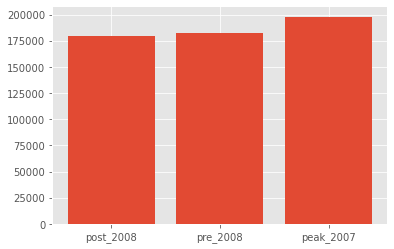

In [89]:
post_2008 = df_train['SalePrice'][date_sold>"2008-07"]
pre_2008 = df_train['SalePrice'][date_sold<"2008-07"]
peak_2007 = df_train['SalePrice'][(date_sold>"2007-07")&(date_sold<"2008-01")]
plt.bar(["post_2008","pre_2008","peak_2007"],[np.mean(post_2008),np.mean(pre_2008),np.mean(peak_2007)])
plt.show()

Looks like this indeed is the case.

On the other hand, a few options in the type and conditions of sale appears to yield significantly different prices. The options are listed as below:

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
Homes just constructed and those sold with 15% Down payment regular terms appear to have a higher price, and so do homes not completed when last assessed. On the other hand, Conventional warranty deeds, Court Officer Deed/Estate, Contract Low down, abnormal sales, and adjoinging land purchases correspond with lower prices in SaleCondition.

## General House Descriptors.

In [327]:
cols = ['MSSubClass','BldgType','HouseStyle','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','YearBuilt','YearRemodAdd']

MSSubClass, upon reading the description, really should be a categorical variable. Let us convert it, and the visualize the effects.

In [328]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')

Below find the description for MSSubClass. Looking at the barplot below, 20, 60, and 120 are correlated with higher prices while 30, 45, and 180 are correlated with lower prices. 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       

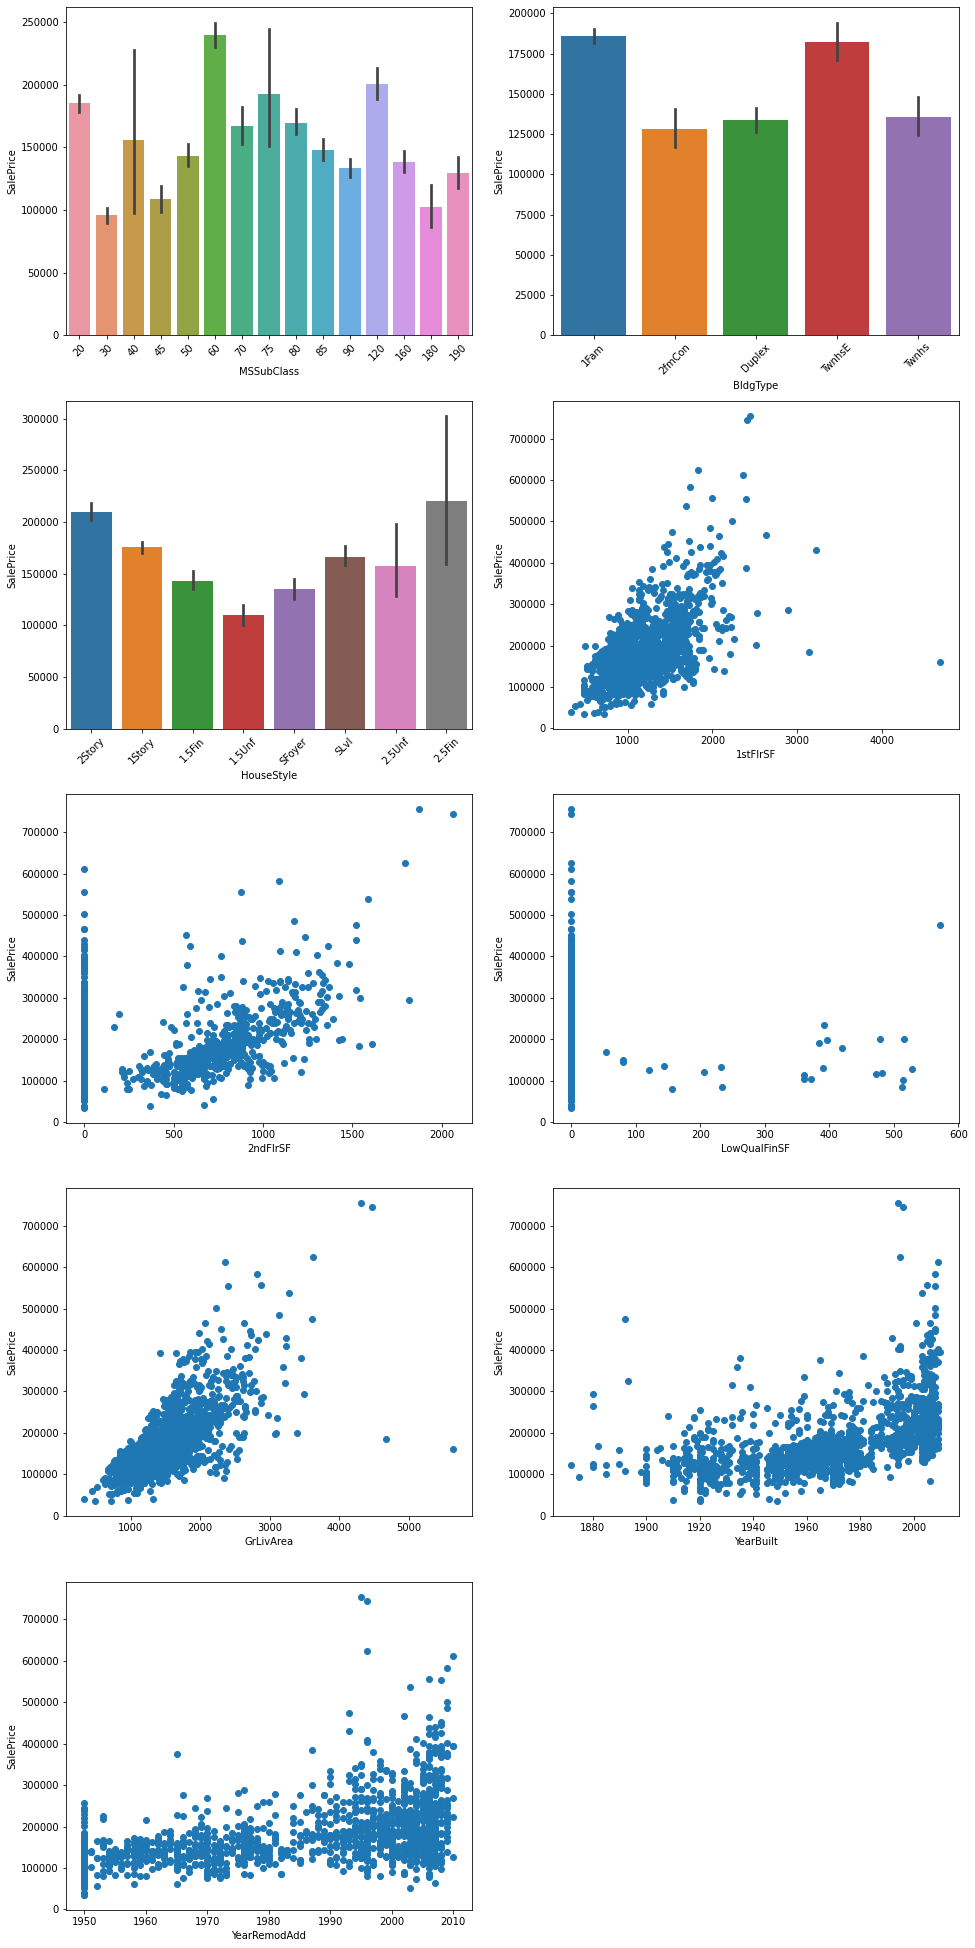

In [329]:
draw_cols(cols)

Observations:
* MsSubclass, as expected, is significant. 20, 45, 180 correlate with lower prices while 60, 120, and 20 correpond with higher prices. 
* BldgType significant: 1Fam and TwnhsE have higher prices, while 2FmCon, Duplex, and Twnhs have lower prices.
* HouseStyle was also significant: 2Story has the highest prices, while 1.5Unf has the lowest. Everything else was in the middle with small error bars except 2.5Unf and 2.5F.
* Both both 1stFloorSF and GrLivArea have a strong positive linear relationship with SalePrice. 
* 2ndFlrSF also appears to have a positive linear relationship with SalePrice. However, there are a lot of Zeros.
* LowQualFinSF appears to have a negative linear relationship with SalePrice. However, the large amount of zeros obfuscate the true relationship.
* Generally both YearBuilt and YearRemodAdd correlate positively with SalePrice; that is, newer houses tend to sell for more.

To begin with, GrLivArea sounds like it would be pretty similar to the combination of the 1stFlrSF and the 2ndFlrSF. I wonder if plotting it will give us a straight line

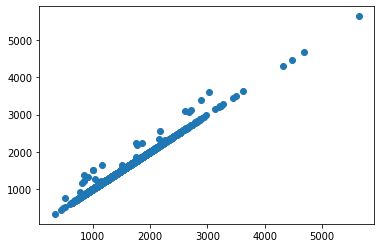

In [330]:
plt.scatter(df_train['1stFlrSF']+df_train['2ndFlrSF'],df_train['GrLivArea'])
plt.show()

As expected, the two are closely related. There are points which don't fall neatly on the line, which is probably due to having a third floor or external living space not accounted for in the calculation of GrLivArea.

Next, 2ndFlrSF has a positive relationship with SalePrice. However, I wonder if having a second floor, regardless of area, correlate with higher prices.

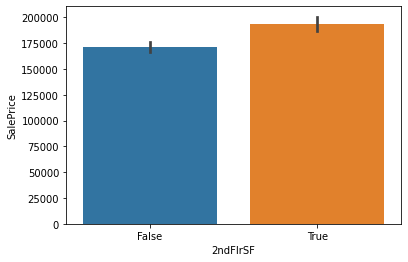

In [331]:
Is2ndFlr = df_train['2ndFlrSF'] > 0
sns.barplot(Is2ndFlr, df_train['SalePrice'])
plt.show()

So having a second floor, regardless of its surface area, increases the house's price. 

Next, I wonder if refurbishing the house makes a difference in the price. Out of the 1400 sales, 764 houses are refurbished. 

In [332]:
#Most aren't refurnanced?
diff = df_train.YearRemodAdd - df_train.YearBuilt
sum(diff==0)

764

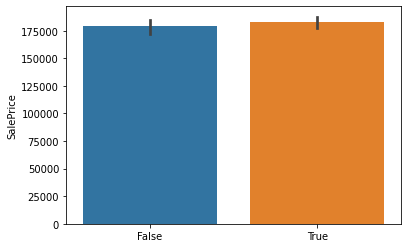

In [333]:
sns.barplot(diff==0,df_train['SalePrice'])
plt.show()

There doesn't appear to be a difference between the two. However, given that the house has been refurbished, does the number of years between when the house was built and when it was refurbished make a difference?

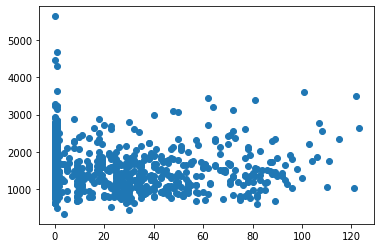

In [334]:
plt.scatter(diff,df_train['GrLivArea'])
plt.show()

I don't really see a linear relationship between the two in the above chart.

From the above graph, it appears that there is a negative relationship between LowQualFinSF and SalePrice, but there were so many 0s that it was difficult to visualize correctly. Thus, I'll first visualize the relationship between non-0 LowQualFinSF and SalePrice

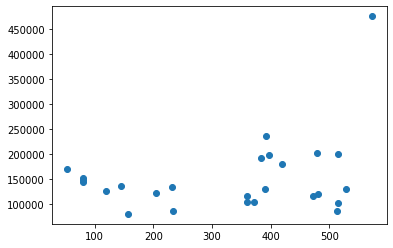

In [335]:
lqfsf = df_train[df_train['LowQualFinSF']!=0]
plt.scatter(lqfsf['LowQualFinSF'],lqfsf['SalePrice'])
plt.show()

The relationship doesn't appear to be negative--in fact, there doesn't appear to be much of a relationship at all. Let's compare those with LowQualFinSF and those without.

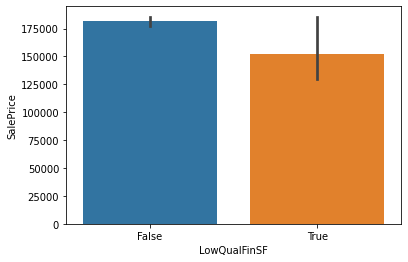

In [336]:
sns.barplot(df_train['LowQualFinSF']!=0,df_train['SalePrice'])
plt.show()

It appears that H=having LowQualFinSF, regardless of surface area, correlates with a lower price, but there is a large error bar.

## Descriptors of the area around the house

In [337]:
cols = ['MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour',
        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2']

Reading the descriptions, LandSlope and LotShape should be converted to numerical as they are really numerical measurements of the land's slopeness and the irregularity of the house, respectively.

In [338]:
landslope_dict = {'Gtl':0,'Mod':1,'Sev':2}
df_train['LandSlope'] = df_train['LandSlope'].map(landslope_dict)
lotshape_dict = {'Reg':0,'IR1':1,'IR2':2,'IR3':3}
df_train['LotShape'] = df_train['LotShape'].map(lotshape_dict)

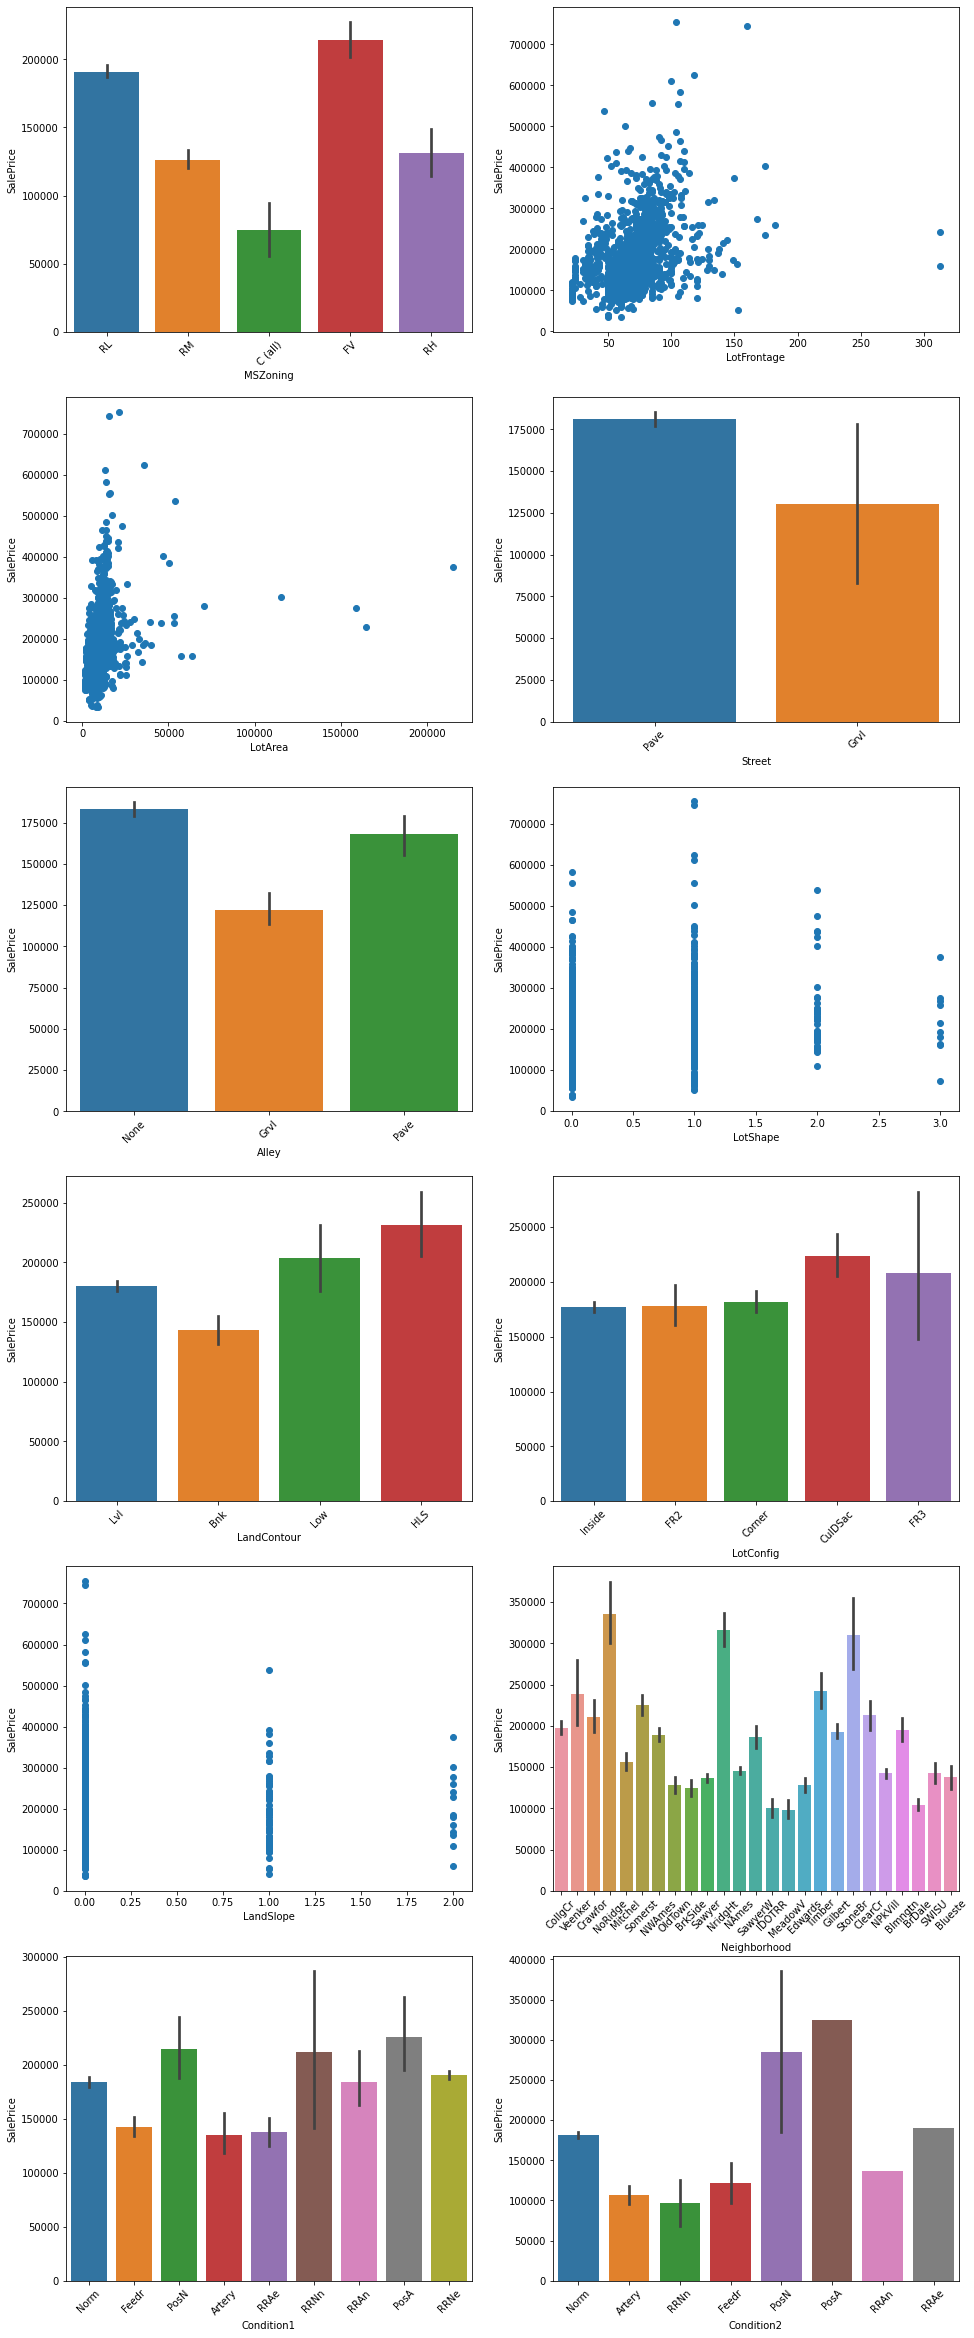

In [339]:
draw_cols(cols)

Observations:
* Different MsZoning Values yield distinctly different prices. Of those, FV (Floating Residential Villages) have higher prices and C (Commercial) yields the lowest.
* LotFrontage and LotArea both appear to have a positive correlations with price, but are skewed by outliers.
* As expected, different neighborhoods correspond with different prices.
* Street appears to be a factor in house price, but there are large error bars.
* The alley category is significant, with None yielding the higest and Gravel yielding the lowest price.
* Generally, the more irregular LotShape is, the less the price is; the more tiled the Landslope is, the less the price is.
* For LandContour, HLS (Hillside) had the highest prices while Bnk (Banked) yielded the lowest.
* Cul-De-Sac yielded a significantly higher price in LotConfig, but not the other options.
* In both conditions 1 and 2, PosA (Adjacent to positive offsite feature) and PosN (have positive off-site feature) corresponded to higher prices while Artery (Adjacent to arterial street) and Feedr (Adjacent to Feeder Street) correlated with lower street.

We mentioned above that some outliers are obfuscating the relationship the independent variables LotFrontage and LotArea have with SalePrice. Below I have removed some outliers and replotted them.

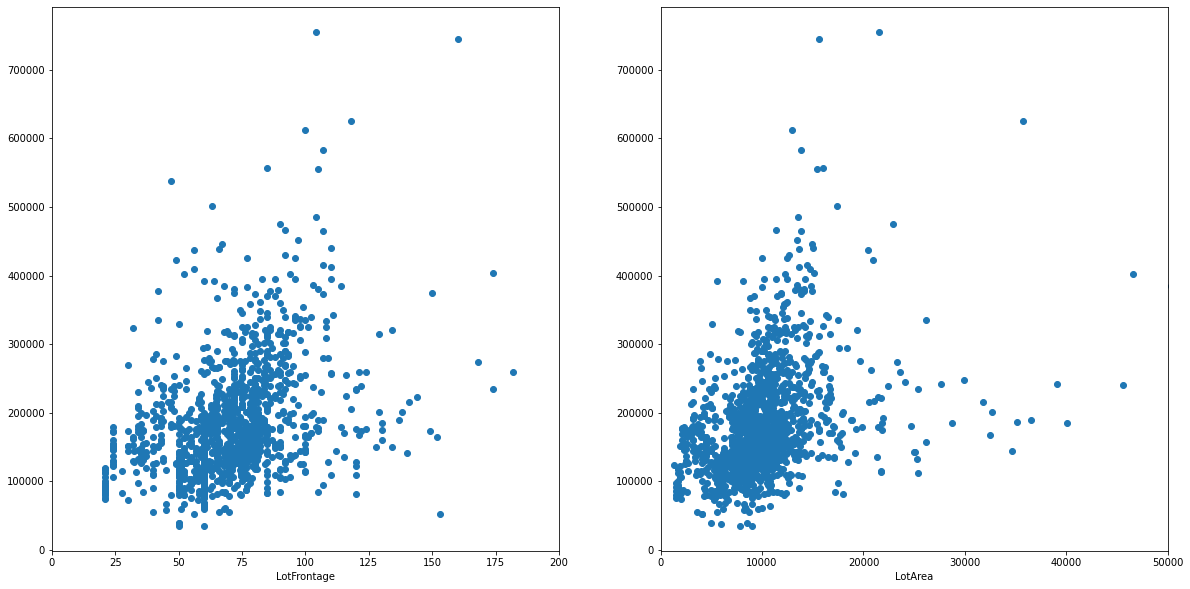

In [340]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(df_train['LotFrontage'],df_train['SalePrice'])
plt.xlim(0,200)
plt.xlabel('LotFrontage')
plt.subplot(1,2,2)
plt.scatter(df_train['LotArea'],df_train['SalePrice'])
plt.xlim(0,50000)
plt.xlabel('LotArea')
plt.show()

Looks like the positive linear relationship is made more apparent. However, looks like the data is still very congregated to the lower left corner. From the graph it looks like both LotArea and Lot Frontage are skewed to the left, so let's try logging them and seeing if a clearer linear relationship can be established. And while we're in the logging business, let's log the SalePrice also.

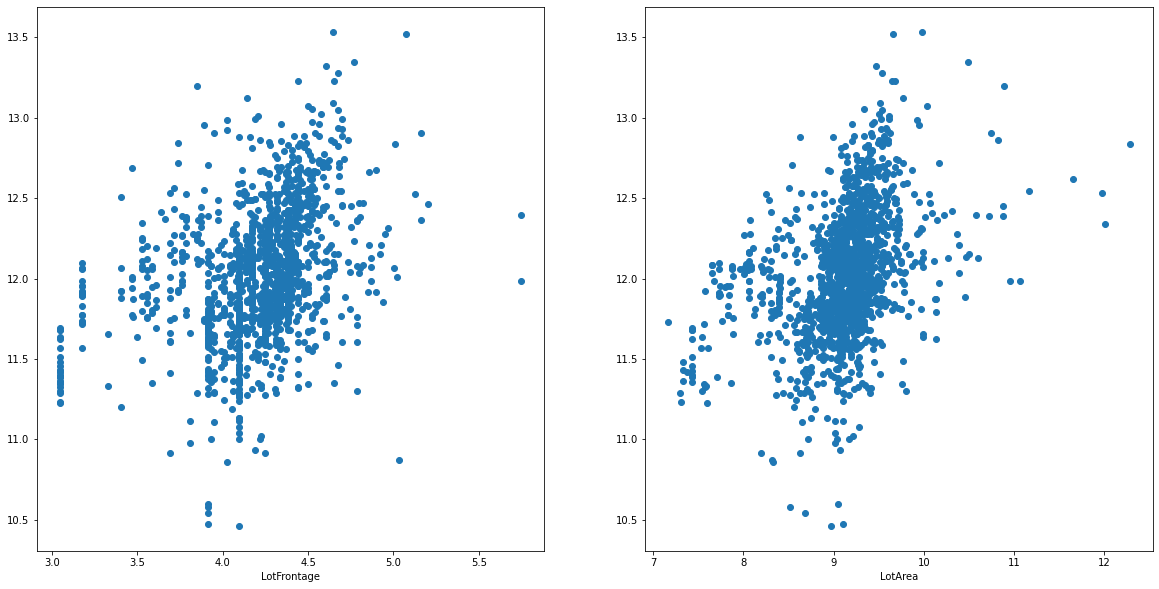

In [341]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(np.log(df_train['LotFrontage']),np.log(df_train['SalePrice']))
plt.xlabel('LotFrontage')
plt.subplot(1,2,2)
plt.scatter(np.log(df_train['LotArea']),np.log(df_train['SalePrice']))
plt.xlabel('LotArea')
plt.show()

After converting to logarithm, the positive linear relationships are made more apparent. 

Next, we should convert the condition columns so that each option is a column of its own. If the sale fits that criteria, it has a 1 in the column. If not, then a 0. We do this for each of the two condition columns and add the results together. 

If there is a two in the Norm column (both condition columns indicate normality), then we change it to 1 to indicate that the sale was normal, likewise, if there is a 1 in the Norm column (only one condition column indicates normality) then we change it to 0 to reflect that the sale was not, in fact, normal.

For all of the other columns, we would need to look at the difference in SalePrice for each of the options. It's possible that a value of two means that the label is true for different instances, but it's also possible that this could be due to erroneous data. Thus, we need to look at the difference to determine if there's value in keeping 2s.

In [342]:
options = pd.get_dummies(df_train[['Condition1','Condition2']])
for x in df_train['Condition1'].unique():
    if 'Condition2_'+x in options.columns:
        options[x] = options['Condition1_'+x] + options['Condition2_'+x]
        options = options.drop(['Condition1_'+x,'Condition2_'+x],axis=1)
    else:
        options[x] = options['Condition1_'+x]
        options = options.drop(['Condition1_'+x],axis=1)
options.head()

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe
0,2,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0


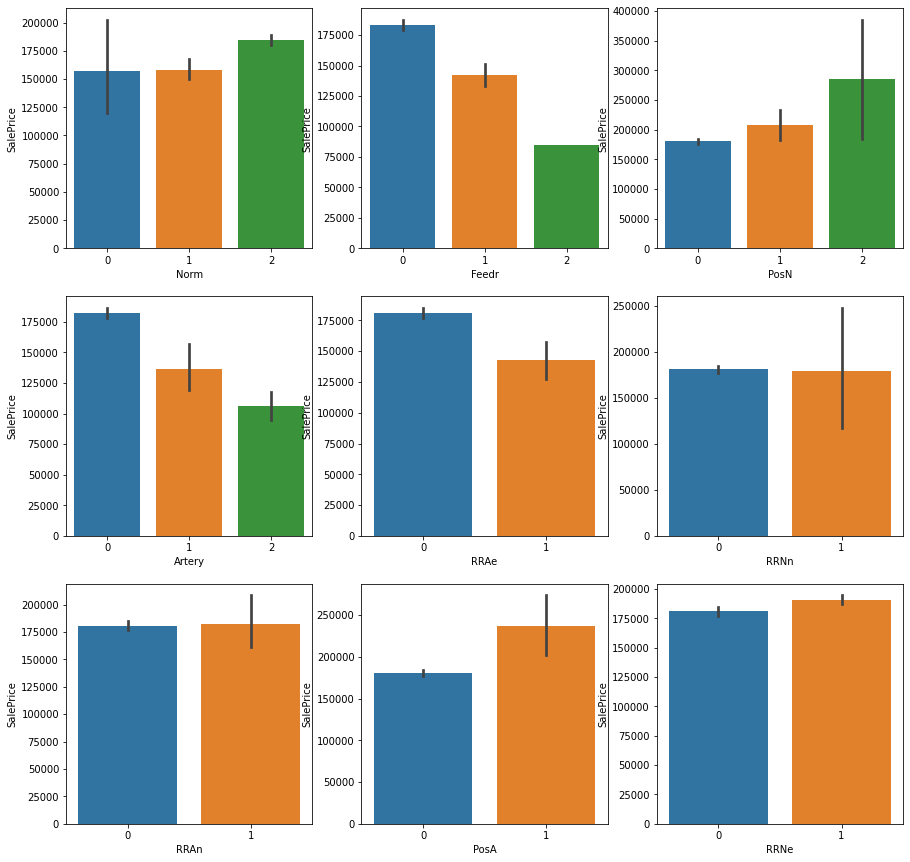

In [343]:
plt.figure(figsize=(15,15))

for i in range(9):
    column = options.columns[i]
    plt.subplot(3,3,i+1)
    sns.barplot(x=options[column],y=df_train['SalePrice'])

plt.show()

The above boxplots show that it is a good idea to make the 2s in Norm 1 and the 1s 0. Fr the others, though, I will keep the 2s because it appears that there is a significant difference between 2s and 1s in the columns that do have 2s.

In [344]:
options['Norm'] = options['Norm'].apply(lambda x: max(x-1,0))
options.head()

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [345]:
df_train = pd.concat([options,df_train],axis=1)
df_train = df_train.drop(['Id','Condition1','Condition2'],axis=1)

## Exterior construction descriptors

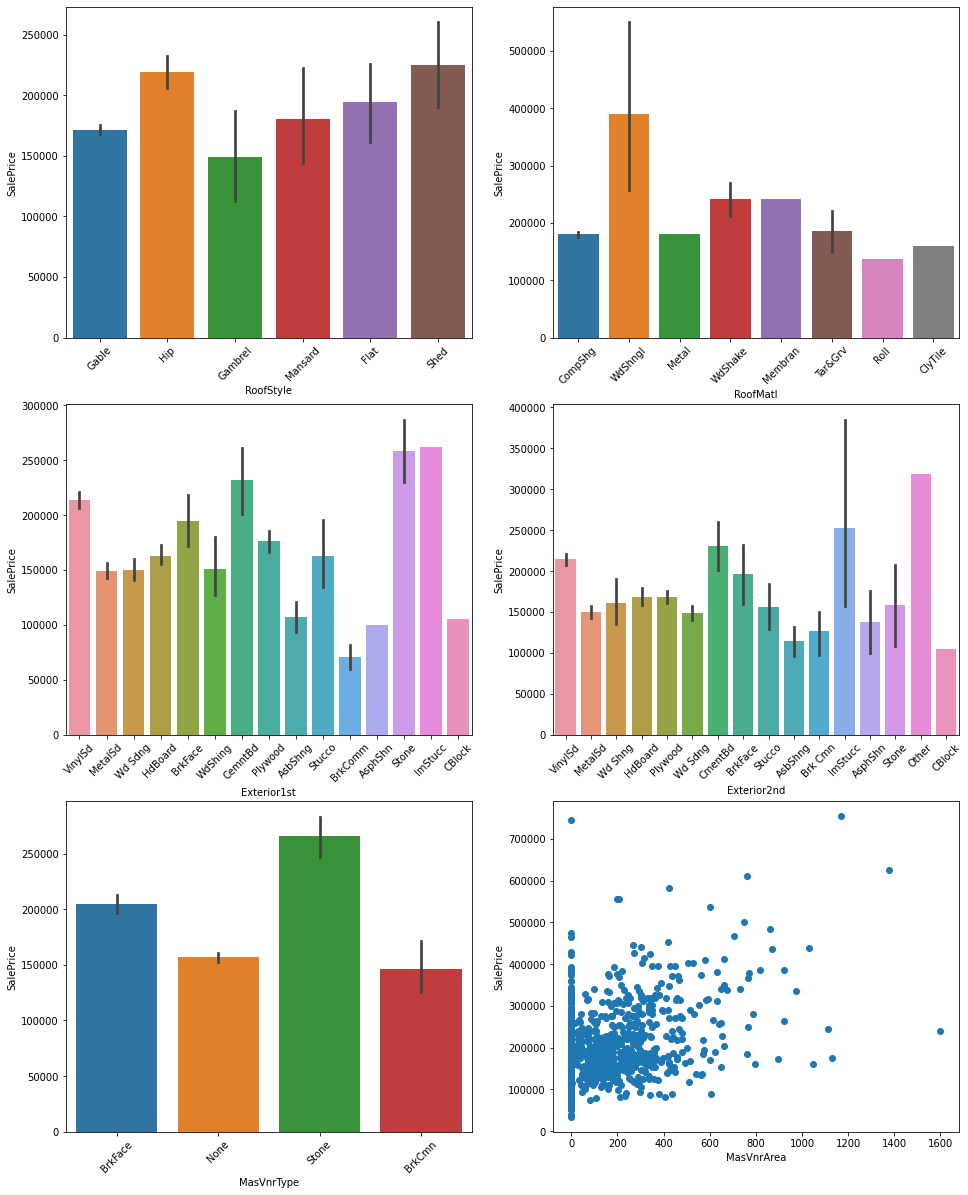

In [346]:
cols = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea']
draw_cols(cols)

Observations:
* RoofStyle appears to be significant, but the error bars are large and overlapping.
* In RoofMatl, WdShngl (Wood Shingles) appears to have a higher SalePrice compared to the others.
* In both Exterior1st and 2nd, BrkCmn (Brick Common) and AsbShng (Asbestos Shingles) have lower SalePrices while CementBd (Cement Board) has higher. Generally the trends are consistent in both except for Stone and other.
* MasVnrType has significant difference in price between its options; BrnCmn (Brick Common) has the lowest, and Stone has the highest. 
* There may be a positive relationship between MasVnrArea and SalePrice, but too much of the the values are in the lower right corner.

First, let's take a look as MasVnrArea. First, there's a lot of 0s in there. Is there a difference in price between those with a MasVnrArea of 0 and those that are not?

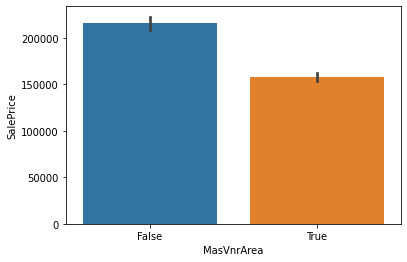

In [347]:
sns.barplot(df_train['MasVnrArea']==0, df_train['SalePrice'])
plt.show()

Looks like True yields lower SalePrices compared to False. Let's take a look at the relationship between the numerical values MasVnrArea and the SalePrice. First, I logged MasVnrArea.

C:\Users\songs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


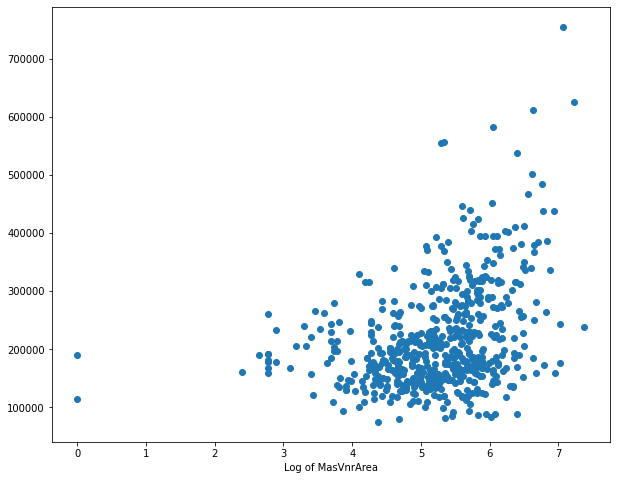

In [348]:
plt.figure(figsize=(10,8))
plt.scatter(np.log(df_train['MasVnrArea']),(df_train['SalePrice']))
plt.xlabel('Log of MasVnrArea')
plt.show()

There is a more obvious positive correlation now. Let's try logging both.

C:\Users\songs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


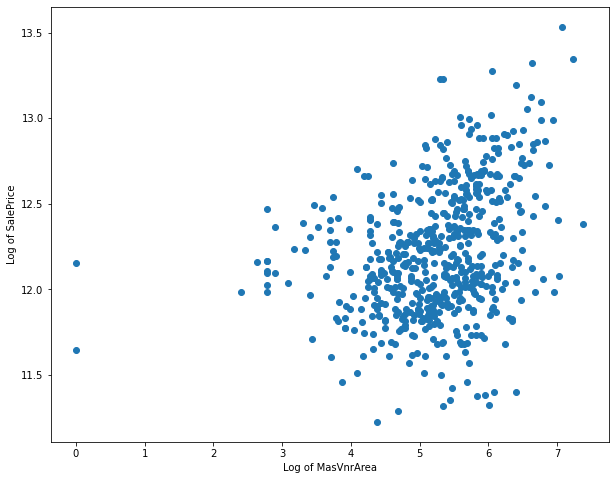

In [349]:
plt.figure(figsize=(10,8))
plt.scatter(np.log(df_train['MasVnrArea']),np.log(df_train['SalePrice']))
plt.xlabel('Log of MasVnrArea')
plt.ylabel('Log of SalePrice')
plt.show()

It looks even clearer than before, though there are two outliers. 

Exterior1st and Exterior2nd both refer to the material covering on the outside of the house, so it makes sense to do what we did for the conditions column above. However, we might wish to examine possible combinations of two different material with those who only have one.

In [350]:
OrderedCombo = df_train['Exterior1st'] + '+' + df_train['Exterior2nd']
dictionary = {}
for x in OrderedCombo.unique():
    x_list = x.split('+')
    if x_list[1] == x_list[0]:
        reverse = x_list[0]
        dictionary[x] = reverse
    else:
        reverse = x_list[1] + '+' + x_list[0]
        dictionary[x] = reverse
        dictionary[reverse] = reverse
    
NoOrderCombo = OrderedCombo.map(dictionary)

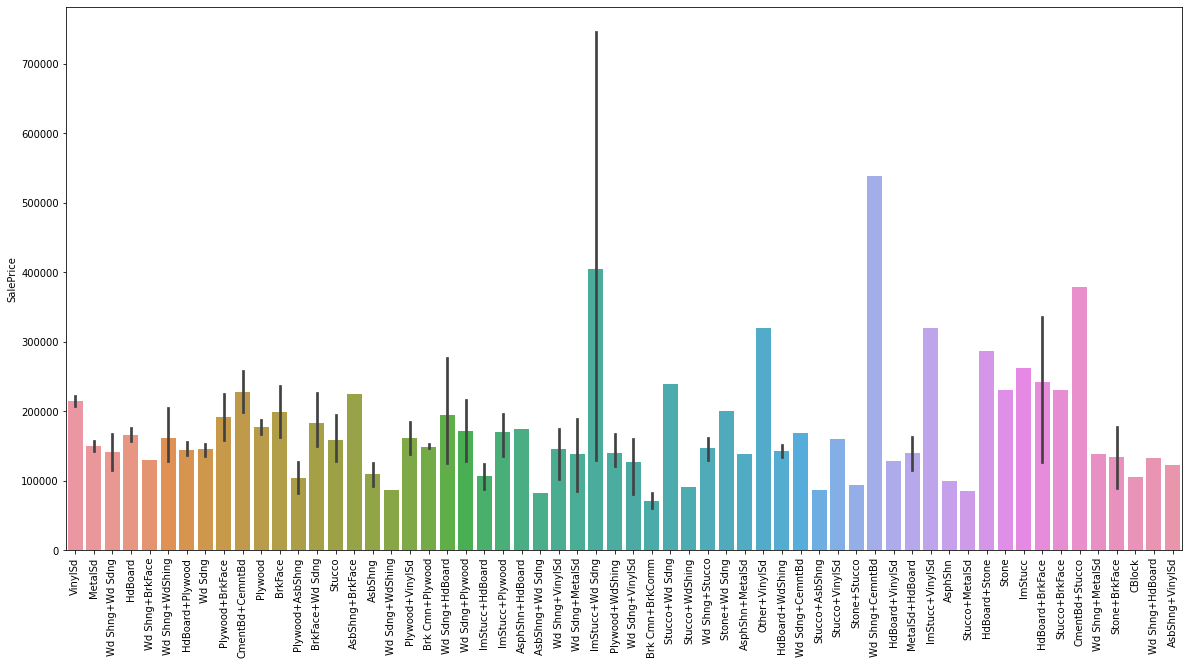

In [351]:
plt.figure(figsize=(20,10))
g = sns.barplot(NoOrderCombo,df_train['SalePrice'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

From the above graph, it looks like WdShng+CemntBg, ImStucc+WdShng, Cemnt+Stucco, Other+VinylSd, and ImStucc+VinylSd yield higher prices compared to the others.

Next, let's look to see if two-material exterior houses have a different price point in general.

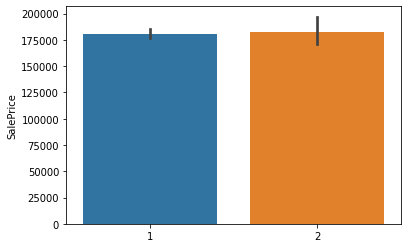

In [352]:
f = lambda x: len(x.split('+'))
numberMaterials = NoOrderCombo.apply(f)
sns.barplot(numberMaterials,df_train['SalePrice'])

There doesn't seem to be a difference between the two.

# Utilities
To begin with, I noticed HeatingQC is really a numerical measurement, so I mapped it to the dictionary I created earlier. In addition, CentralAir really should be a Boolean Column. I made these conversions below.

In [353]:
df_train['HeatingQC'] = df_train['HeatingQC'].map(excellency_d)
df_train['CentralAir'] = (df_train['CentralAir']=='Y').astype('int')

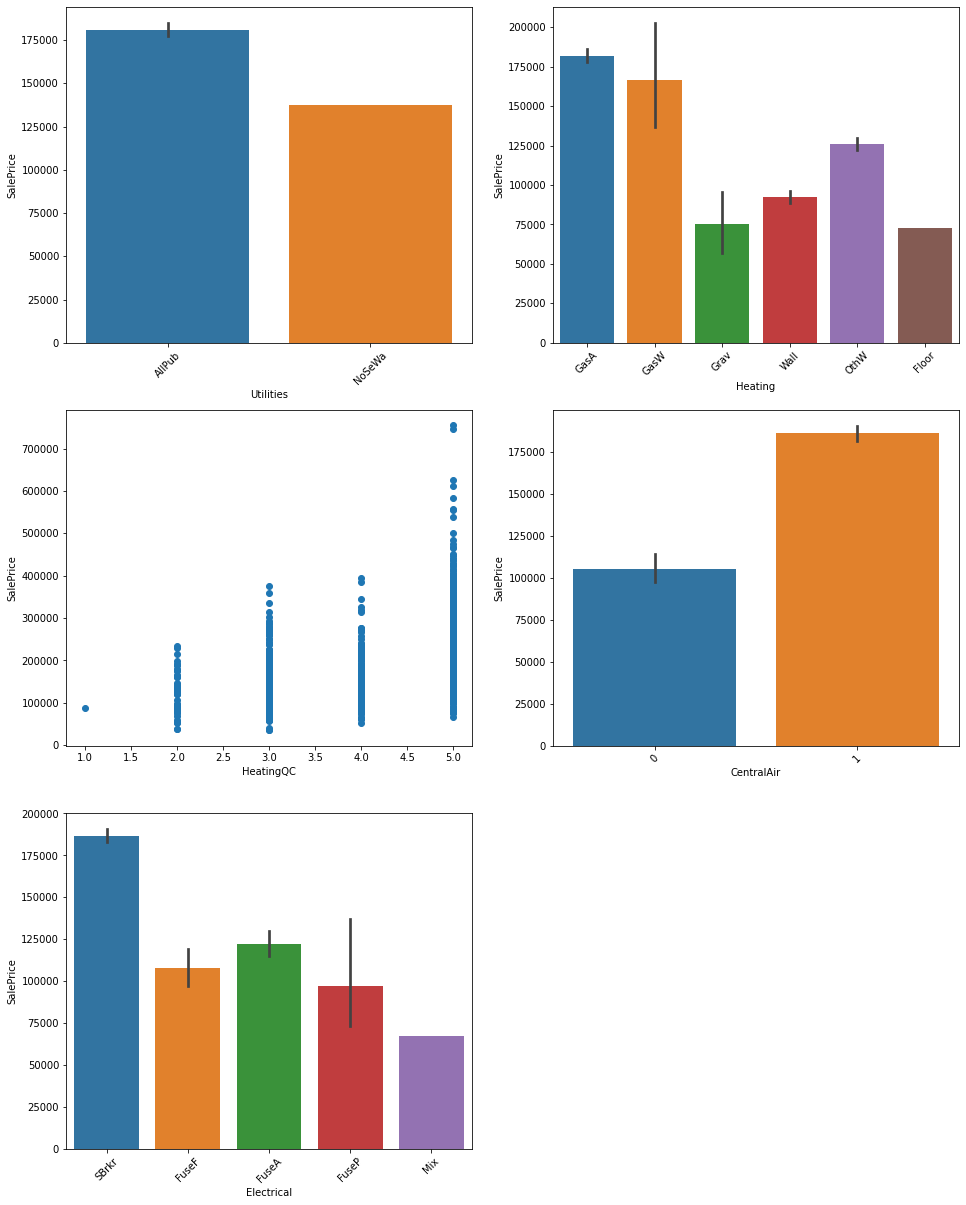

In [354]:
cols = ['Utilities','Heating','HeatingQC','CentralAir','Electrical']
draw_cols(cols)

Observations:
* In Utilities, houses with NoSeWa (Electricity and Gas Only) sold of significantly less than those with all utilities, but there is only one sample.
* GasA (Gas forced warm air furnace) and GasW (Gas hot water or steam heat) have significantly higher prices than the other options in Heating, even with GasW's wide standard deviation.
* As expected, HeatingQC has a positive correlation with SalePrice.
* Also as expected, those with CentralAir has a higher price compared to those without,
* In Electrical, those with SBrKr (Standard Circuit Breakers & Romex) sold the highest, while those with mixed sold for the lowest.


# Below the ground qualities

In [355]:
for col in ['BsmtQual','BsmtCond','BsmtExposure']:
    df_train[col] = df_train[col].map(excellency_d)

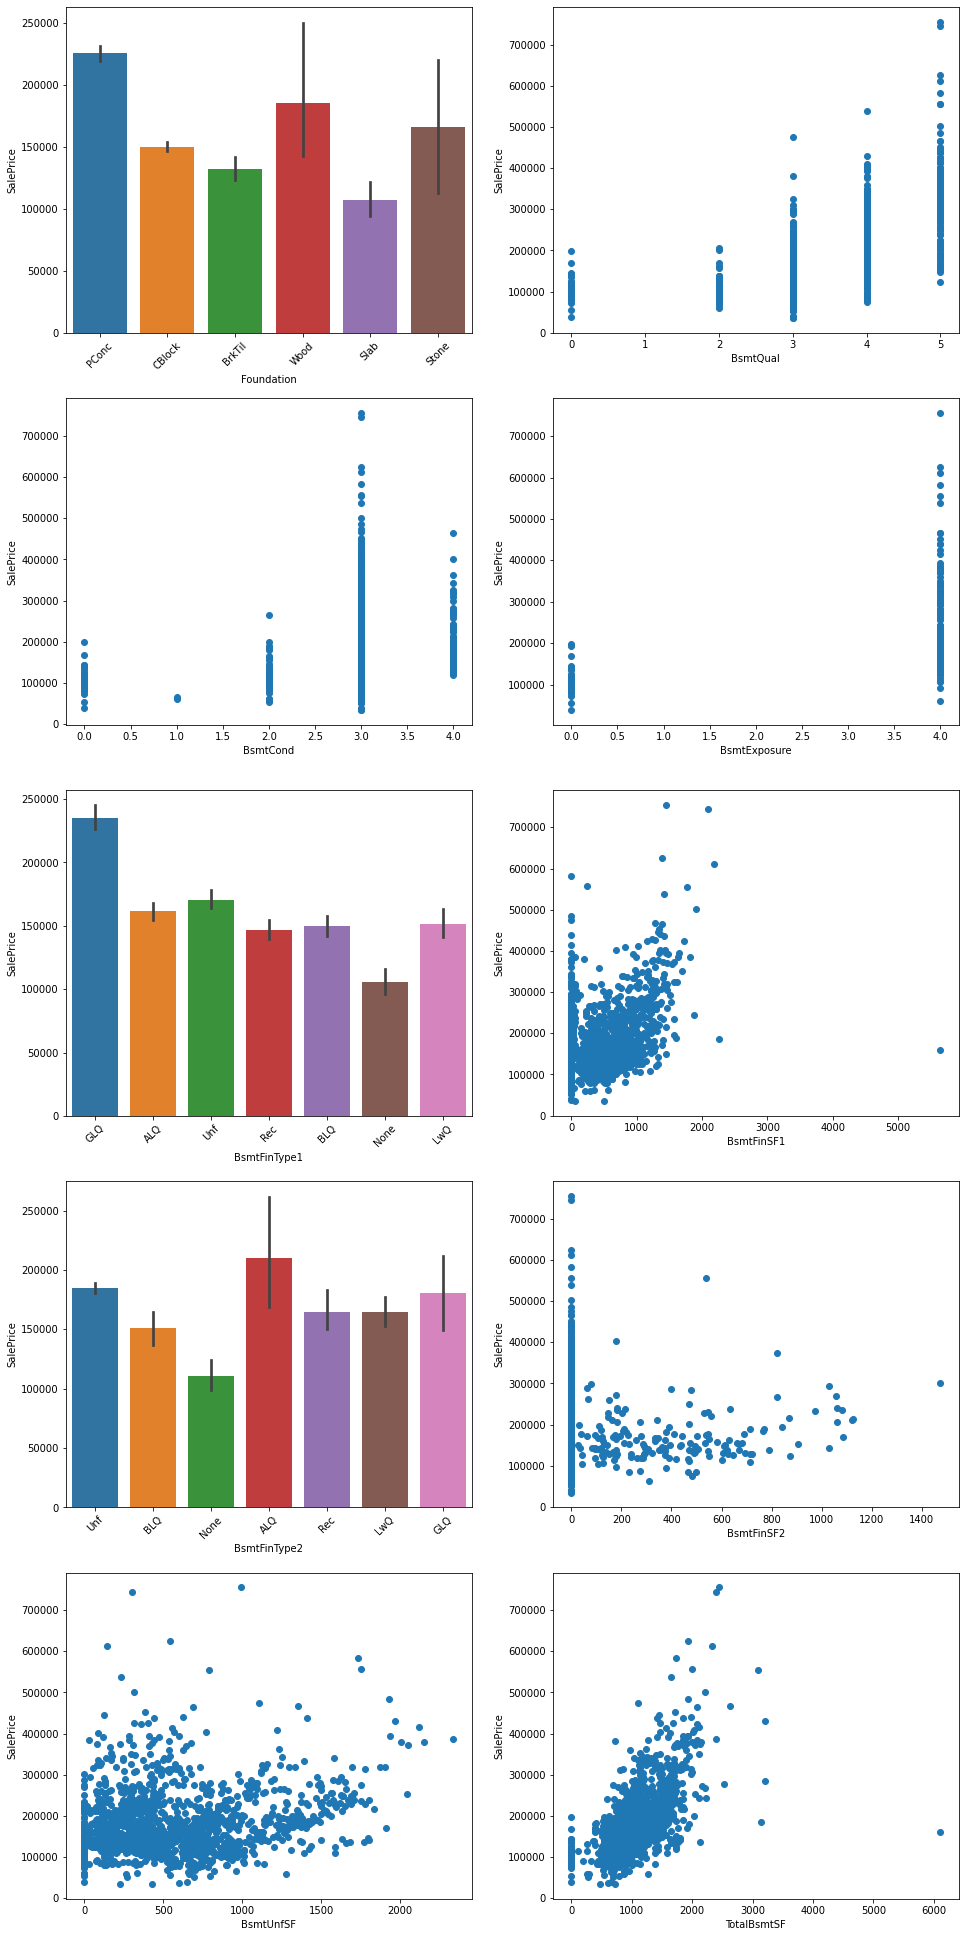

In [356]:
cols = ['Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
draw_cols(cols)

Observations:
* Foundation: CBlock, BrkTil, and Slob all have significantly lower prices, and PConc is significantly higher. The others, Wood and Stone, have very wide standard deviations.
* BsmtQual and Bsmt Cond: Generally the higher quality the basement the higher the price was for the house, which is not surprising. However, it seems that houses with a "fair" quality basement sold as approximately the same price point as houses with no basement at all, and houses with a "poor" quality basement actually sold cheaper.
* BsmtExposure: Of course, having a basement with good exposure is more expensive than having no basement at all.
* BsmtFinType1 and BsmtFinType2: This is a similar situation with Exterior1st and Exterior2nd, where there's a lot of variation in the categories' relationship to each other. The only constant is having no basement yielded lower prices than all of them.
* BsmtFinSF1 and TotalBsmtSF have a strong positive correlation with SalePrice.
* The positive correlation is not as obvious in BsmtFinSF2.
* BsmtUnfSF seems to have a curvilinear relationship going on with Saleprice, with the a negative relationship when BsmtUnfSF < 1000 and a positive relationship when BsmtUnfSF > 1000.

Let's so what we did to the exterior columns to the BsmtFinType Columns.

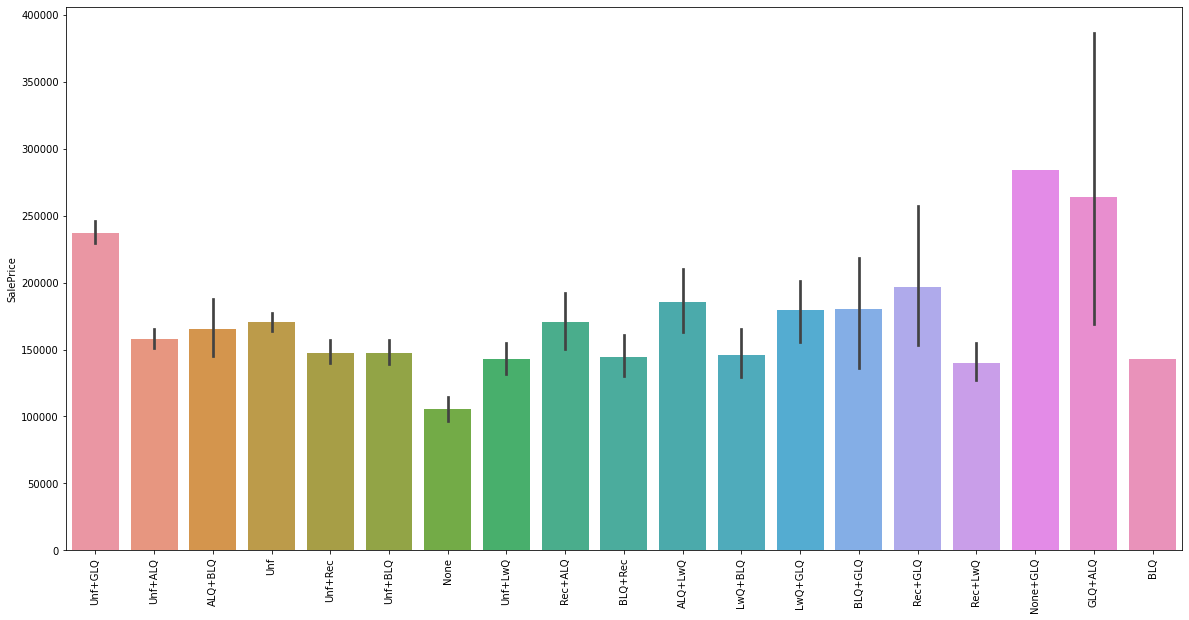

In [357]:
OrderedBsmtCombo = df_train['BsmtFinType1'] + '+' + df_train['BsmtFinType2']
dictionary = {}
for x in OrderedBsmtCombo.unique():
    x_list = x.split('+')
    if x_list[1] == x_list[0]:
        reverse = x_list[0]
        dictionary[x] = reverse
    else:
        reverse = x_list[1] + '+' + x_list[0]
        dictionary[x] = reverse
        dictionary[reverse] = reverse
    
NoOrderBsmtCombo = OrderedBsmtCombo.map(dictionary)

plt.figure(figsize=(20,10))
g = sns.barplot(NoOrderBsmtCombo,df_train['SalePrice'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

Looking at above, we noticed that Unf+GLQ, GLQ+ALQ and GLQ have higher SalePrices compared to others. Next, we would like to examine if there is a positive linear relationship between the BsmfFinSF2 anf SalePrice. Below I have selected for all SalePrice with BsmtFinSF2 > 2, and it seems tht there is indeed a positive linear relationship.

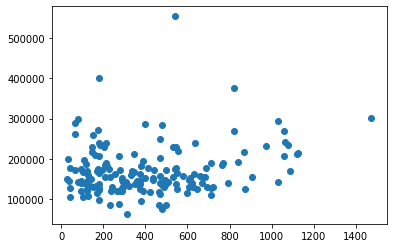

In [358]:
bsf2_not0 = df_train[df_train['BsmtFinSF2']!=0]
plt.scatter(bsf2_not0['BsmtFinSF2'],bsf2_not0['SalePrice'])
plt.show()

For BsmtUnfSF, I had wondered if a quadratic relationship might suit the variables relationship with SalePrice better, but doesn't look like the case.

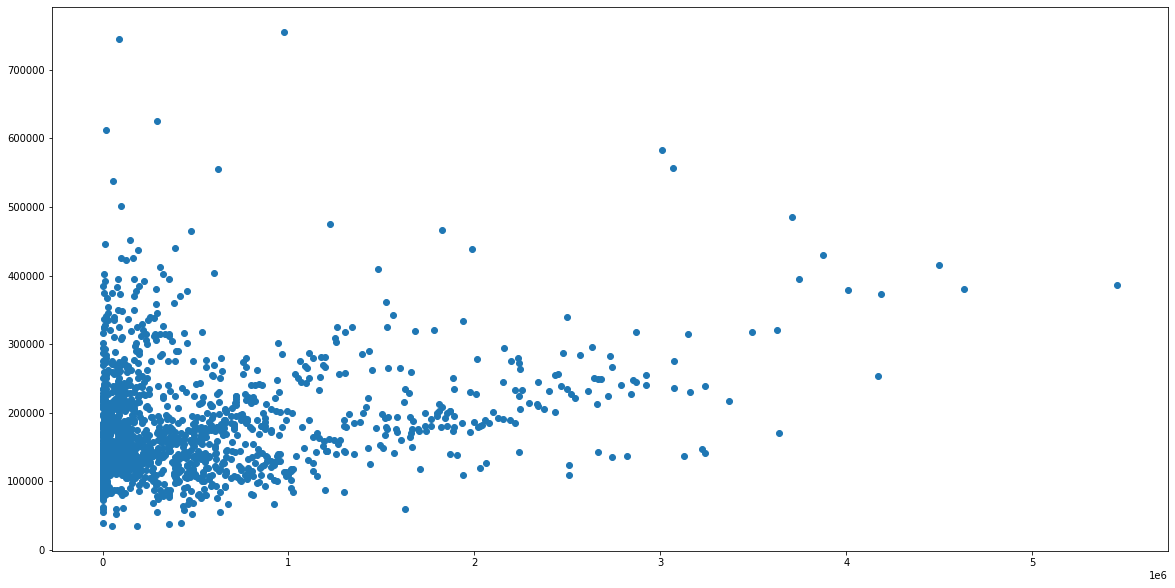

In [359]:
plt.figure(figsize=(20,10))
plt.scatter((df_train['BsmtUnfSF'])**2,(df_train['SalePrice']))
plt.show()

# Garage Variables

In [360]:
for col in ['GarageQual','GarageCond']:
    df_train[col] = df_train[col].map(excellency_d)
df_train['PavedDrive'] = df_train['PavedDrive'].map({'Y':1,'N':0,'P':0.5})    

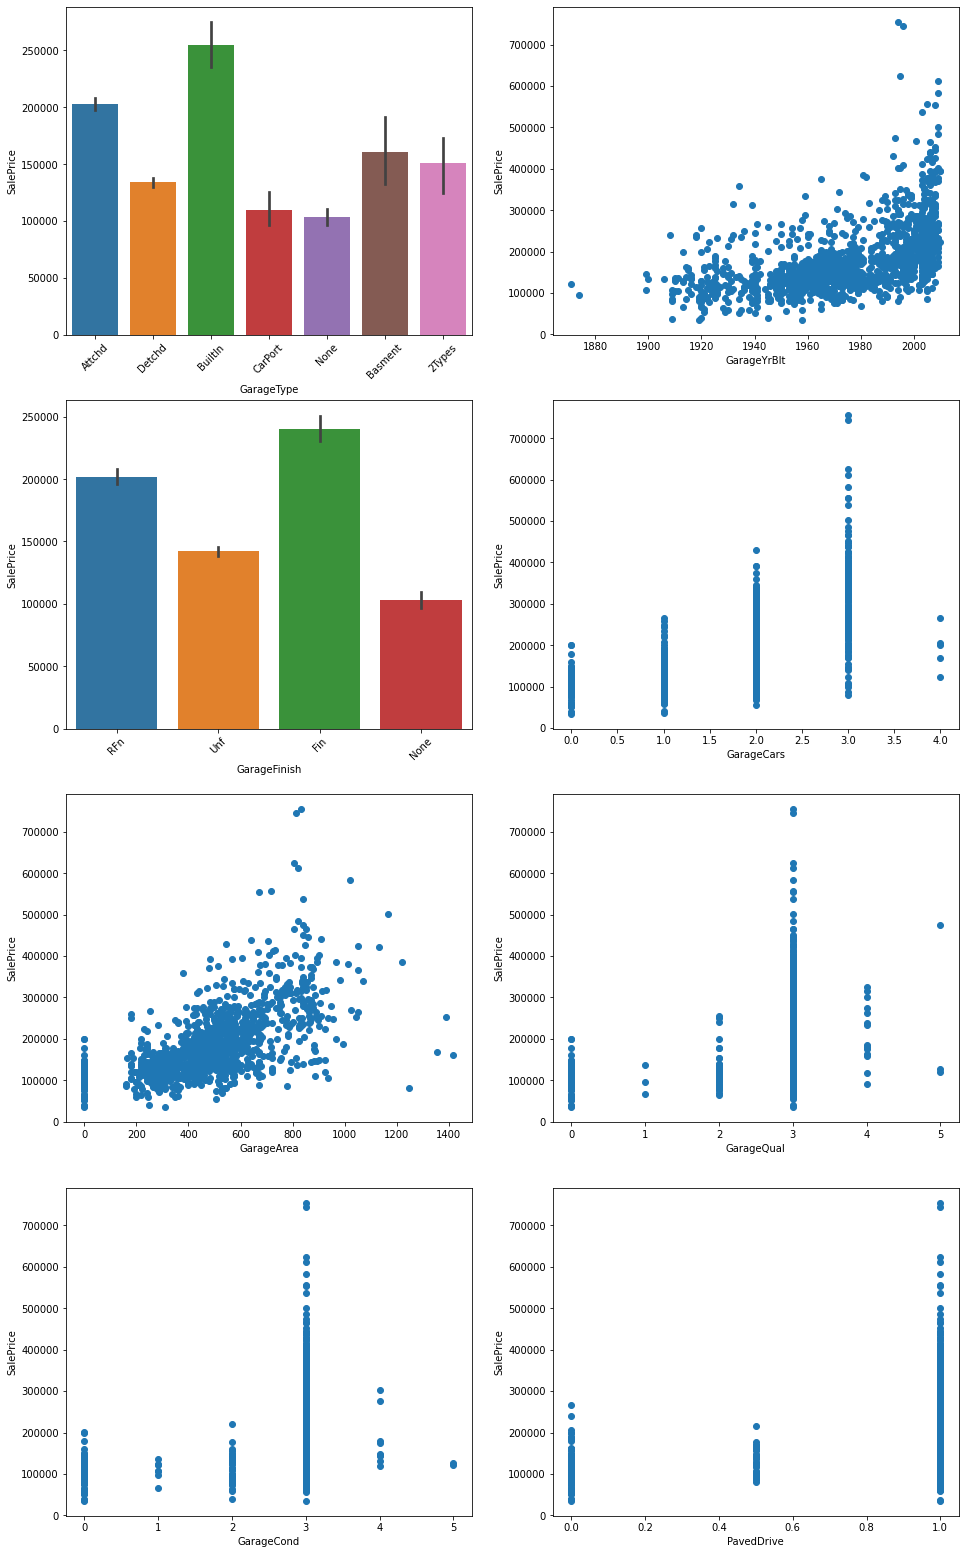

In [361]:
cols = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive']
draw_cols(cols)

Observations:
* GarageType: Builtin had the highest, and None and CarPort had the lowest. 
* GarageYrBuilt: generally demonstrated a positive linear relationship with the SalePrice. However, need to investigate is this is just a reflection of salePrice's relationship with the year the house was built.
* GarageFinish: All the different options had significantly different SalePrices
* GarageArea and GarageCars: both show that larger garages correlate with higher prices.
* GarageQual and GarageCond: Looks like an average/typical garage condition correlates with higher prices.
* PavedDrive: Looks like those with a paved Driveway had higher prices.

I wonder what the relationship between GarageYrBlt and YearBuilt is, since I'd imagine there's a relationship between the two.

In [362]:
(df_train['GarageYrBlt'] - df_train['YearBuilt']).value_counts().head()

 0.0    1089
-1.0      84
 1.0      52
 2.0      16
 3.0      10
dtype: int64

As shown above, for the vast majority the Year that the Garage was built is equal to the year the the house was built. However, older houses (built before the cars were popular, perhaps?) have garages made more recently.

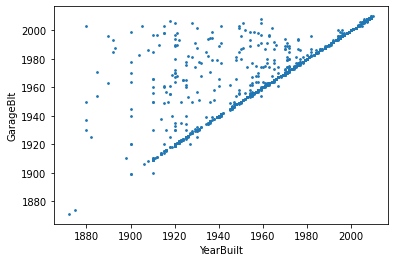

In [363]:
plt.scatter(df_train['YearBuilt'],df_train['GarageYrBlt'], s=3)
plt.ylabel('GarageBlt')
plt.xlabel('YearBuilt')
plt.show()

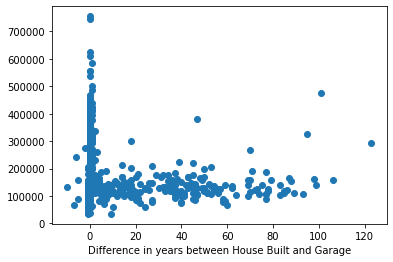

In [364]:
plt.scatter(df_train['GarageYrBlt']-df_train['YearBuilt'],df_train['SalePrice'])
plt.xlabel('Difference in years between House Built and Garage')
plt.show()

The difference in years between when the Garage was built and when the house was built doesn't correlate with the price.

In the above scatter plot, it seems that there are Garanges which are older than the house? This is unusual, so let's take a look at the questionable rows.

In [365]:
df_train[df_train['GarageYrBlt']-df_train['YearBuilt']<0]

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
29,0,1,0,0,0,1,0,0,0,30,RM,60.000000,6324,Pave,None,1,Lvl,AllPub,Inside,0,BrkSide,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,NaN,Unf,0,Unf,0,520,520,GasA,2,0,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,0,0,None,Detchd,1920.0,Unf,1,240,2,3,1.0,49,0,87,0,0,0,None,None,None,0,5,2008,WD,Normal,68500
39,1,0,0,0,0,0,0,0,0,90,RL,65.000000,6040,Pave,None,0,Lvl,AllPub,Inside,0,Edwards,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,3,3,PConc,0,0,0.0,None,0,None,0,0,0,GasA,3,0,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,0,0,None,None,1954.0,None,0,0,0,0,0.0,0,0,0,0,0,0,None,None,None,0,6,2008,WD,AdjLand,82000
48,1,0,0,0,0,0,0,0,0,190,RM,33.000000,4456,Pave,None,0,Lvl,AllPub,Inside,0,OldTown,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,3,NaN,Unf,0,Unf,0,736,736,GasA,4,1,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,0,0,None,None,1919.0,None,0,0,0,0,0.0,0,0,102,0,0,0,None,None,None,0,6,2009,New,Partial,113000
78,1,0,0,0,0,0,0,0,0,90,RL,72.000000,10778,Pave,None,0,Lvl,AllPub,Inside,0,Sawyer,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3,3,NaN,Unf,0,Unf,0,1768,1768,GasA,3,0,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,0,0,None,None,1967.0,None,0,0,0,0,1.0,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,136500
88,0,2,0,0,0,0,0,0,0,50,C (all),105.000000,8470,Pave,None,1,Lvl,AllPub,Corner,0,IDOTRR,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,3,2,NaN,Unf,0,Unf,0,1013,1013,GasA,3,0,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,0,0,None,None,1914.0,None,0,0,0,0,0.0,0,0,156,0,0,0,None,MnPrv,None,0,10,2009,ConLD,Abnorml,85000
89,1,0,0,0,0,0,0,0,0,20,RL,60.000000,8070,Pave,None,0,Lvl,AllPub,Inside,0,CollgCr,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,NaN,GLQ,588,Unf,0,402,990,GasA,5,1,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,0,0,None,None,1993.0,None,0,0,0,0,1.0,0,0,0,0,0,0,None,None,None,0,8,2007,WD,Normal,123600
93,1,0,0,0,0,0,0,0,0,190,C (all),60.000000,7200,Pave,None,0,Lvl,AllPub,Corner,0,OldTown,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3,2,NaN,Rec,1046,Unf,0,168,1214,GasW,5,0,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,0,1,Gd,Detchd,1900.0,Unf,2,506,3,3,1.0,0,0,0,0,99,0,None,None,None,0,11,2007,WD,Normal,133900
99,1,0,0,0,0,0,0,0,0,20,RL,77.000000,9320,Pave,None,1,Lvl,AllPub,Inside,0,NAmes,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3,3,NaN,ALQ,569,Unf,0,381,950,GasA,2,1,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,0,0,None,None,1958.0,None,0,0,0,0,1.0,352,0,0,0,0,0,None,None,Shed,400,1,2010,WD,Normal,128950
108,0,0,0,1,0,0,0,0,0,50,RM,85.000000,8500,Pave,None,0,Lvl,AllPub,Corner,0,IDOTRR,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,NaN,Unf,0,Unf,0,793,793,GasW,3,0,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,0,0,None,None,1918.0,None,0,0,0,0,0.0,0,0,144,0,0,0,None,None,None,0,8,2007,WD,Normal,115000
125,1,0,0,0,0,0,0,0,0,190,RM,60.000000,6780,Pave,None,0,Lvl,AllPub,Inside,0,IDOTRR,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3,3,Na

I don't see anything unusual, but maybe these issues will come up.

# Rooms above ground

In [366]:
df_train['KitchenQual'] = df_train['KitchenQual'].map(excellency_d) 

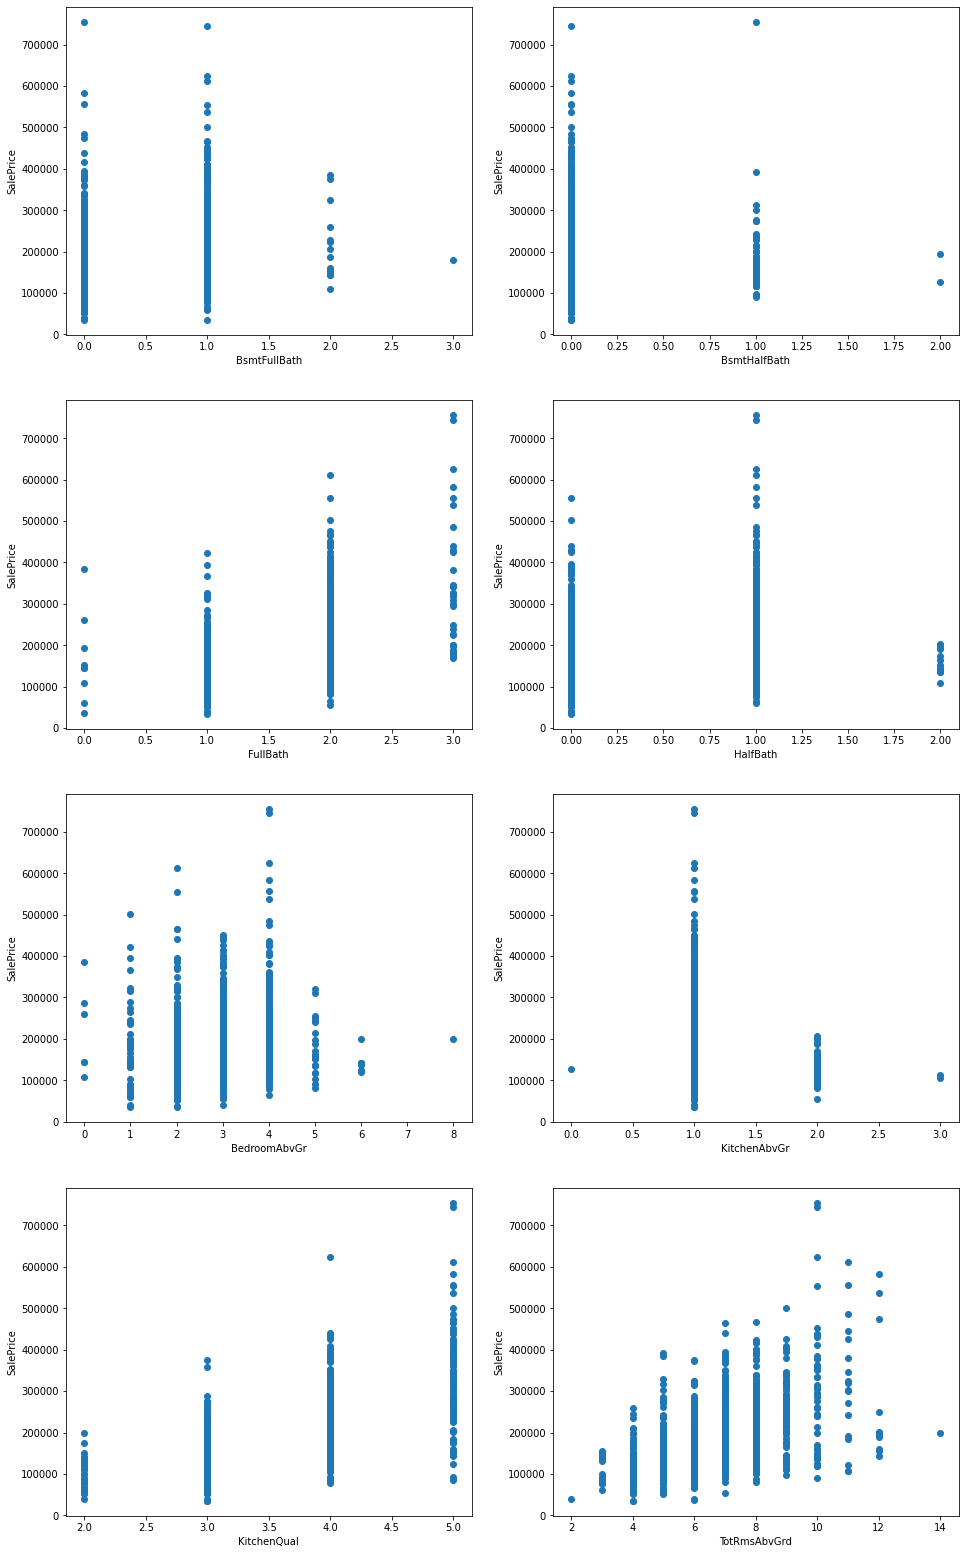

In [367]:
cols = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd']
draw_cols(cols)

Observations:
* Contrary to what we'd expect, even though TotRmsAbvGrd correlates positively with SalePrice, the number of different types of rooms in house--except for FullBath--don't. In fact, BsmtHalfBath and KitchenAbvGrd appear to have a negative correlation with SalePrice.
* Perhaps there's interaction between the number of different types of rooms, which makes sense, actually. Perhaps a house with too many bedrooms are lacking in other utilities, or a house with two half bathrooms has no full bathrooms, which decrease the price.
* But KitchenQual has a positive correlation with HousePrice.

I wonder if the size of the room (The total living area divided by number of rooms above ground) has an impact on the Price.

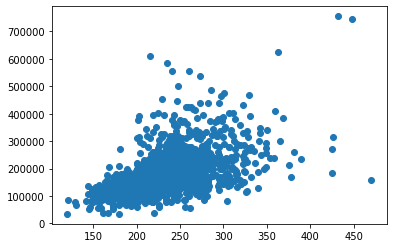

In [368]:
plt.scatter(df_train['GrLivArea']/df_train['TotRmsAbvGrd'], df_train['SalePrice'])
plt.show()

The above shows a positive correlation between the average room size and the house price.

I wonder if the percentage of rooms belonging to a specific type has an impact on the price. For example, maybe bedroom-heavy houses sell more than bathroom-heavy houses?

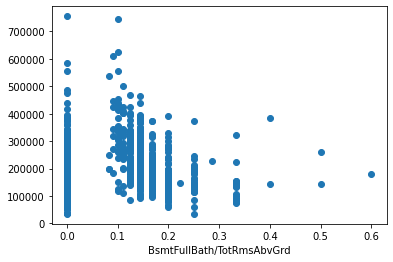

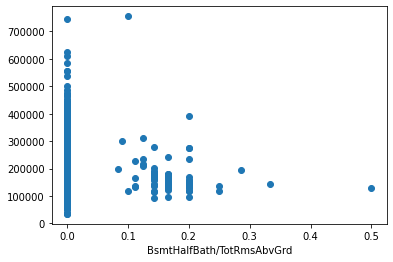

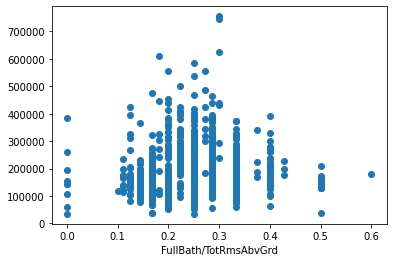

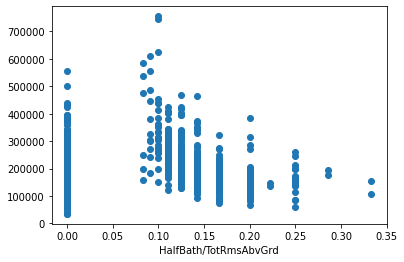

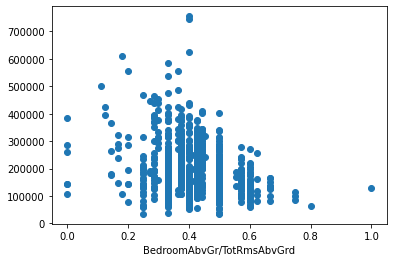

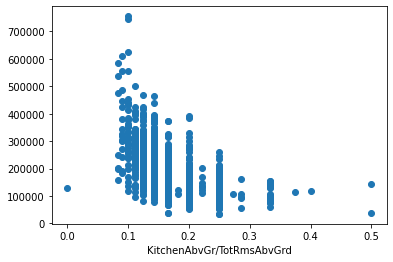

In [369]:
for x in ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr']:
    plt.scatter(df_train[x]/df_train['TotRmsAbvGrd'], df_train['SalePrice'])
    plt.xlabel(x+'/TotRmsAbvGrd')
    plt.show()

It appears that for all specific room types, the higher percentage they occupy out of the total number of rooms above ground, the lower the price was. 

# Miscellaneous Functions

In [370]:
for col in ['FireplaceQu','PoolQC']:
    df_train[col] = df_train[col].map(excellency_d)

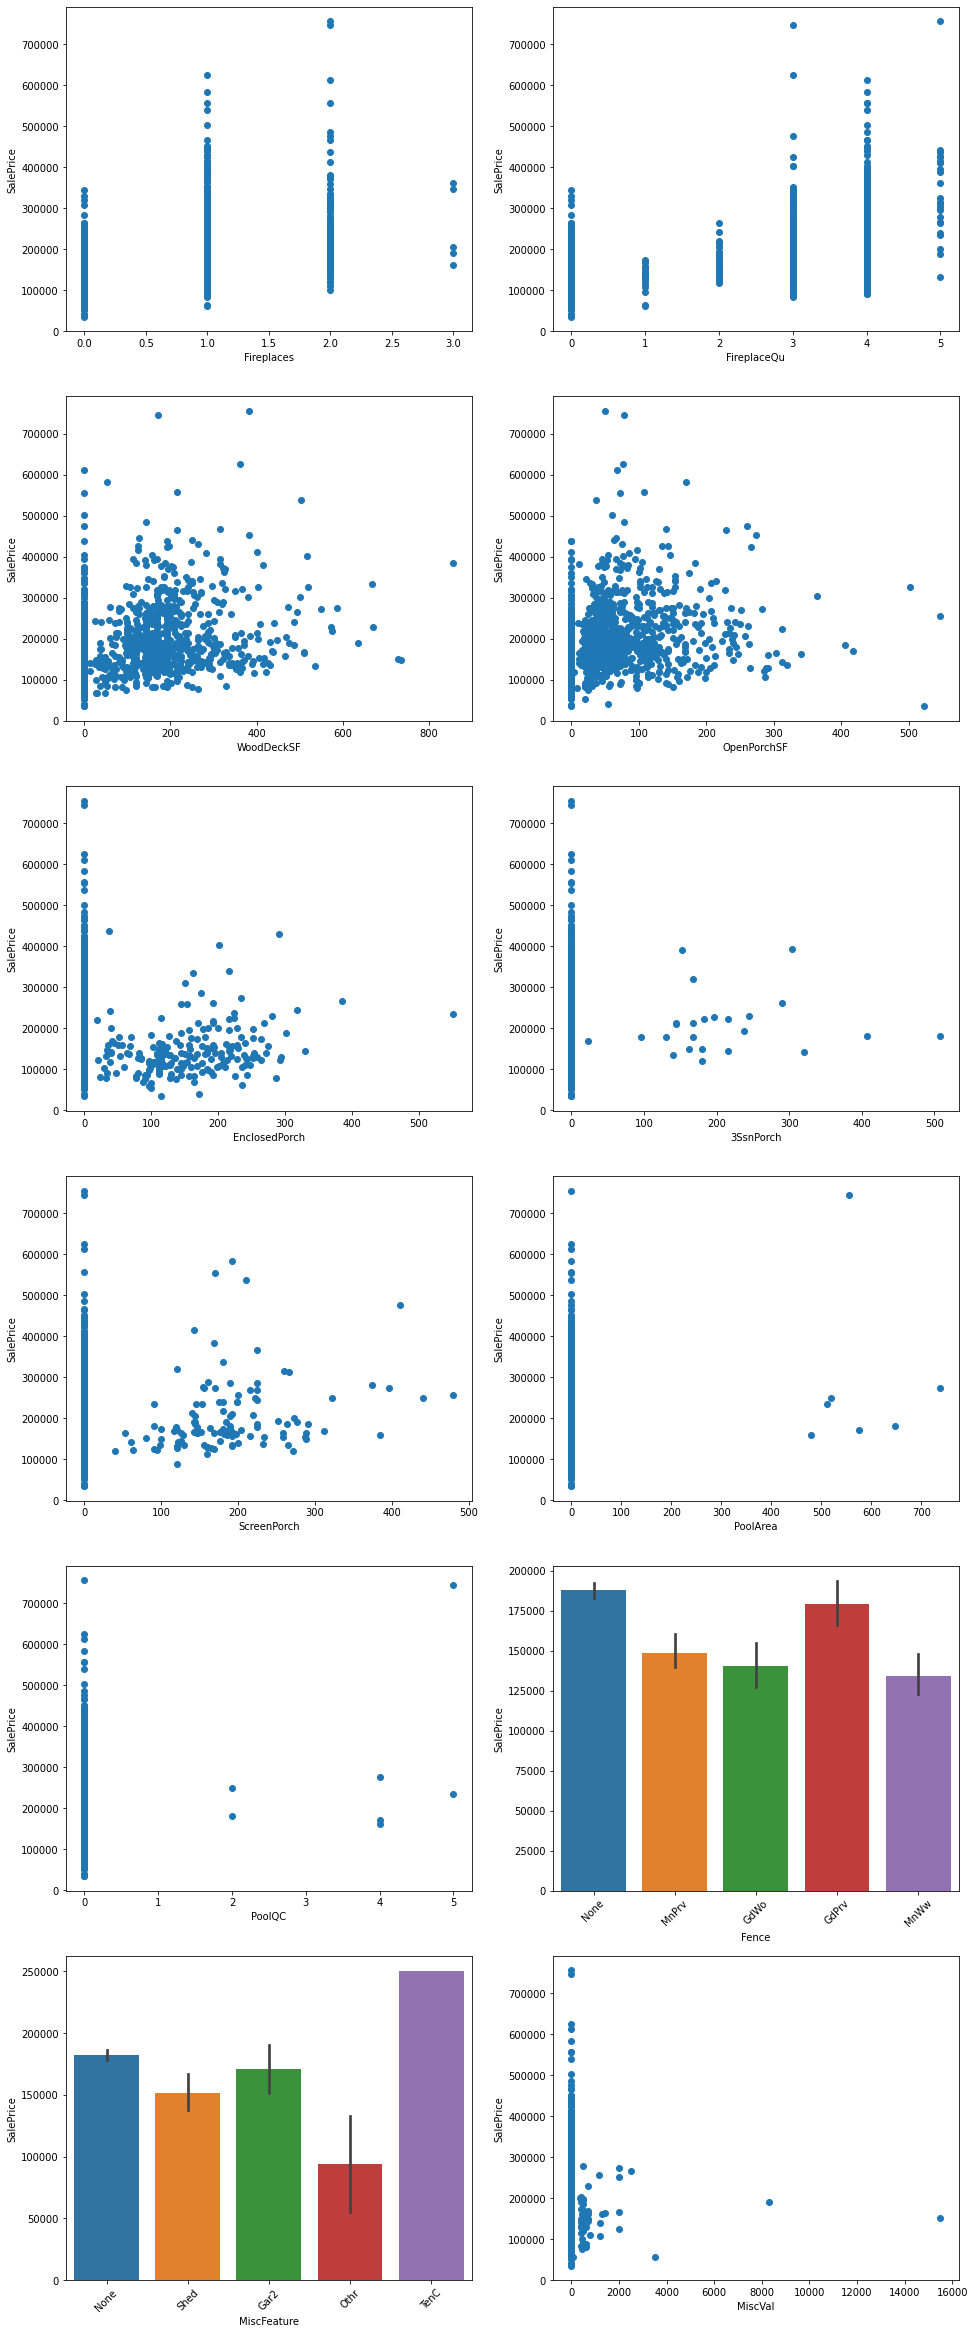

In [371]:
cols = ['Fireplaces','FireplaceQu','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal']
draw_cols(cols)

Observations:
* It seems that PoolQC, MiscVal, ScreenPorch, EnclosedPorch, 3ssnPorch and PoolArea doesn't have an impact on the house price.
* In MiscFeature, Othr is the lowest with a high error bar.
* Both WoodDeckSF and OpenPorchSF have a positive correlation with SalePrice.
* Fireplaces and FireplaceQu have a correlation with SalePrice.
* In Fences, None and GdPrv have a higher price than the rest, but between them there is no difference.

In [386]:
df_train.to_csv(r'C:\Users\songs\Desktop\CSV files\Project 1\Intermediate Files\cleaned_train.csv',index=False)


## Statistical Analysis
#### Generating num_summary
Next, we're going to take a quick look at all the numerical variables' relationship with our target variable. As we have 30+ numerical columns, it'd not be realistic to do individual regression analyses on all of them one by one.

In the below table, I extracted the summary statistics in the .describe() method, as well as some other relevant information pertaining to the variable's relation with SalePrice.

In [387]:
#Let's redo the categorical and numerical column extraction
cate = [col for col in df_train.columns if df_train[col].dtype not in ['int64','float64']]
num = [col for col in df_train.columns if df_train[col].dtype in ['int64','float64']]

#Print statement of number of features.
print('There are a total of {} columns, {} categorical and {} numerical.'.format(len(df_train.columns),len(cate),len(num)))

There are a total of 87 columns, 37 categorical and 50 numerical.


In [388]:
def extract_stat(col):
    table = pd.DataFrame(df_train[col].describe()).T
    table['kurt'] = df_train[col].kurt()
    table['skew'] = df_train[col].skew()
    f, p = stats.normaltest(df_train[col])
    if p > 0.05:
        table['IsNormal'] = True
    else:
        table['IsNormal'] = False
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_train[col], df_train['SalePrice'])
    table['r^2'] = r_value**2
    table['slope'] = slope
    table['intercept'] = intercept
    table['p_value'] = p_value
    table['IsSignificant'] = p_value < 0.05
    return table
    
dfs = [extract_stat(col) for col in num]
num_summary = pd.concat(dfs)
num_summary = num_summary.sort_values('r^2', ascending=False)

In [384]:
num_summary

,count,mean,std,min,25%,50%,75%,max,kurt,skew,IsNormal,r^2,slope,intercept,p_value,IsSignificant
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.000000,214000.00,755000.0,6.536282,1.882876,False,1.000000,1.000000,0.000000e+00,0.000000e+00,True
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0,0.096293,0.216944,False,0.625652,45435.802593,-9.620608e+04,2.185675e-313,True
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.000000,1776.75,5642.0,4.895121,1.366560,False,0.502149,107.130359,1.856903e+04,4.518034e-223,True
ExterQual,1460.0,3.395890,0.574280,2.0,3.00,3.000000,4.00,5.0,0.060816,0.825988,False,0.465996,94432.205405,-1.397602e+05,7.331707e-201,True
KitchenQual,1460.0,3.511644,0.663760,2.0,3.00,3.000000,4.00,5.0,-0.247537,0.386765,False,0.435072,78944.594672,-9.630410e+04,5.051357e-183,True
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.000000,2.00,4.0,0.220998,-0.342549,False,0.410124,68077.997646,6.061898e+04,2.498644e-169,True
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.000000,576.00,1418.0,0.917067,0.179981,False,0.388667,231.645615,7.135742e+04,5.265038e-158,True
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.500000,1298.25,6110.0,13.250483,1.524255,False,0.376481,111.109604,6.343063e+04,9.484229e-152,True
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.000000,1391.25,4692.0,5.745841,1.376757,False,0.367057,124.500622,3.617345e+04,5.394711e-147,True
BsmtQual,1460.0,3.489041,0.876478,0.0,3.00,4.000000,4.00,5.0,4.416646,-1.287571,False,0.342467,53042.182588,-4.145159e+03,6.512989e-135,True


There's a few observations to be made about the above analysis:
1. 7 of the 50 columns are not significant with an alpha of 0.05 (5e^-2)
2. The variables vary large in scale. Our target variable (SalePrice) spans across hundreds of thousands, while variables like BedroomAbvGr and KitchenAbvGr only have single digits. 
3. None of the numerical columns are normal.
4. Some of the numerical variables might be more useful if converted to Booleans (PoolArea, EnclosedPorch, ScreenPorch, etc).

In [385]:
#Let's save this really quick, so we can refer back to this later.
num_summary.to_csv(r'C:\Users\songs\Desktop\CSV files\Project 1\Intermediate Files\num_summary_1.csv', index=False)

#### Visualizing Intercorrelations

Next, we're going to look for any notable intercorrelations among our variables. While intercorrelation won't have an impact on the error of the regression itself, and we won't be able to completely eliminate it, it is still helpful to be aware.

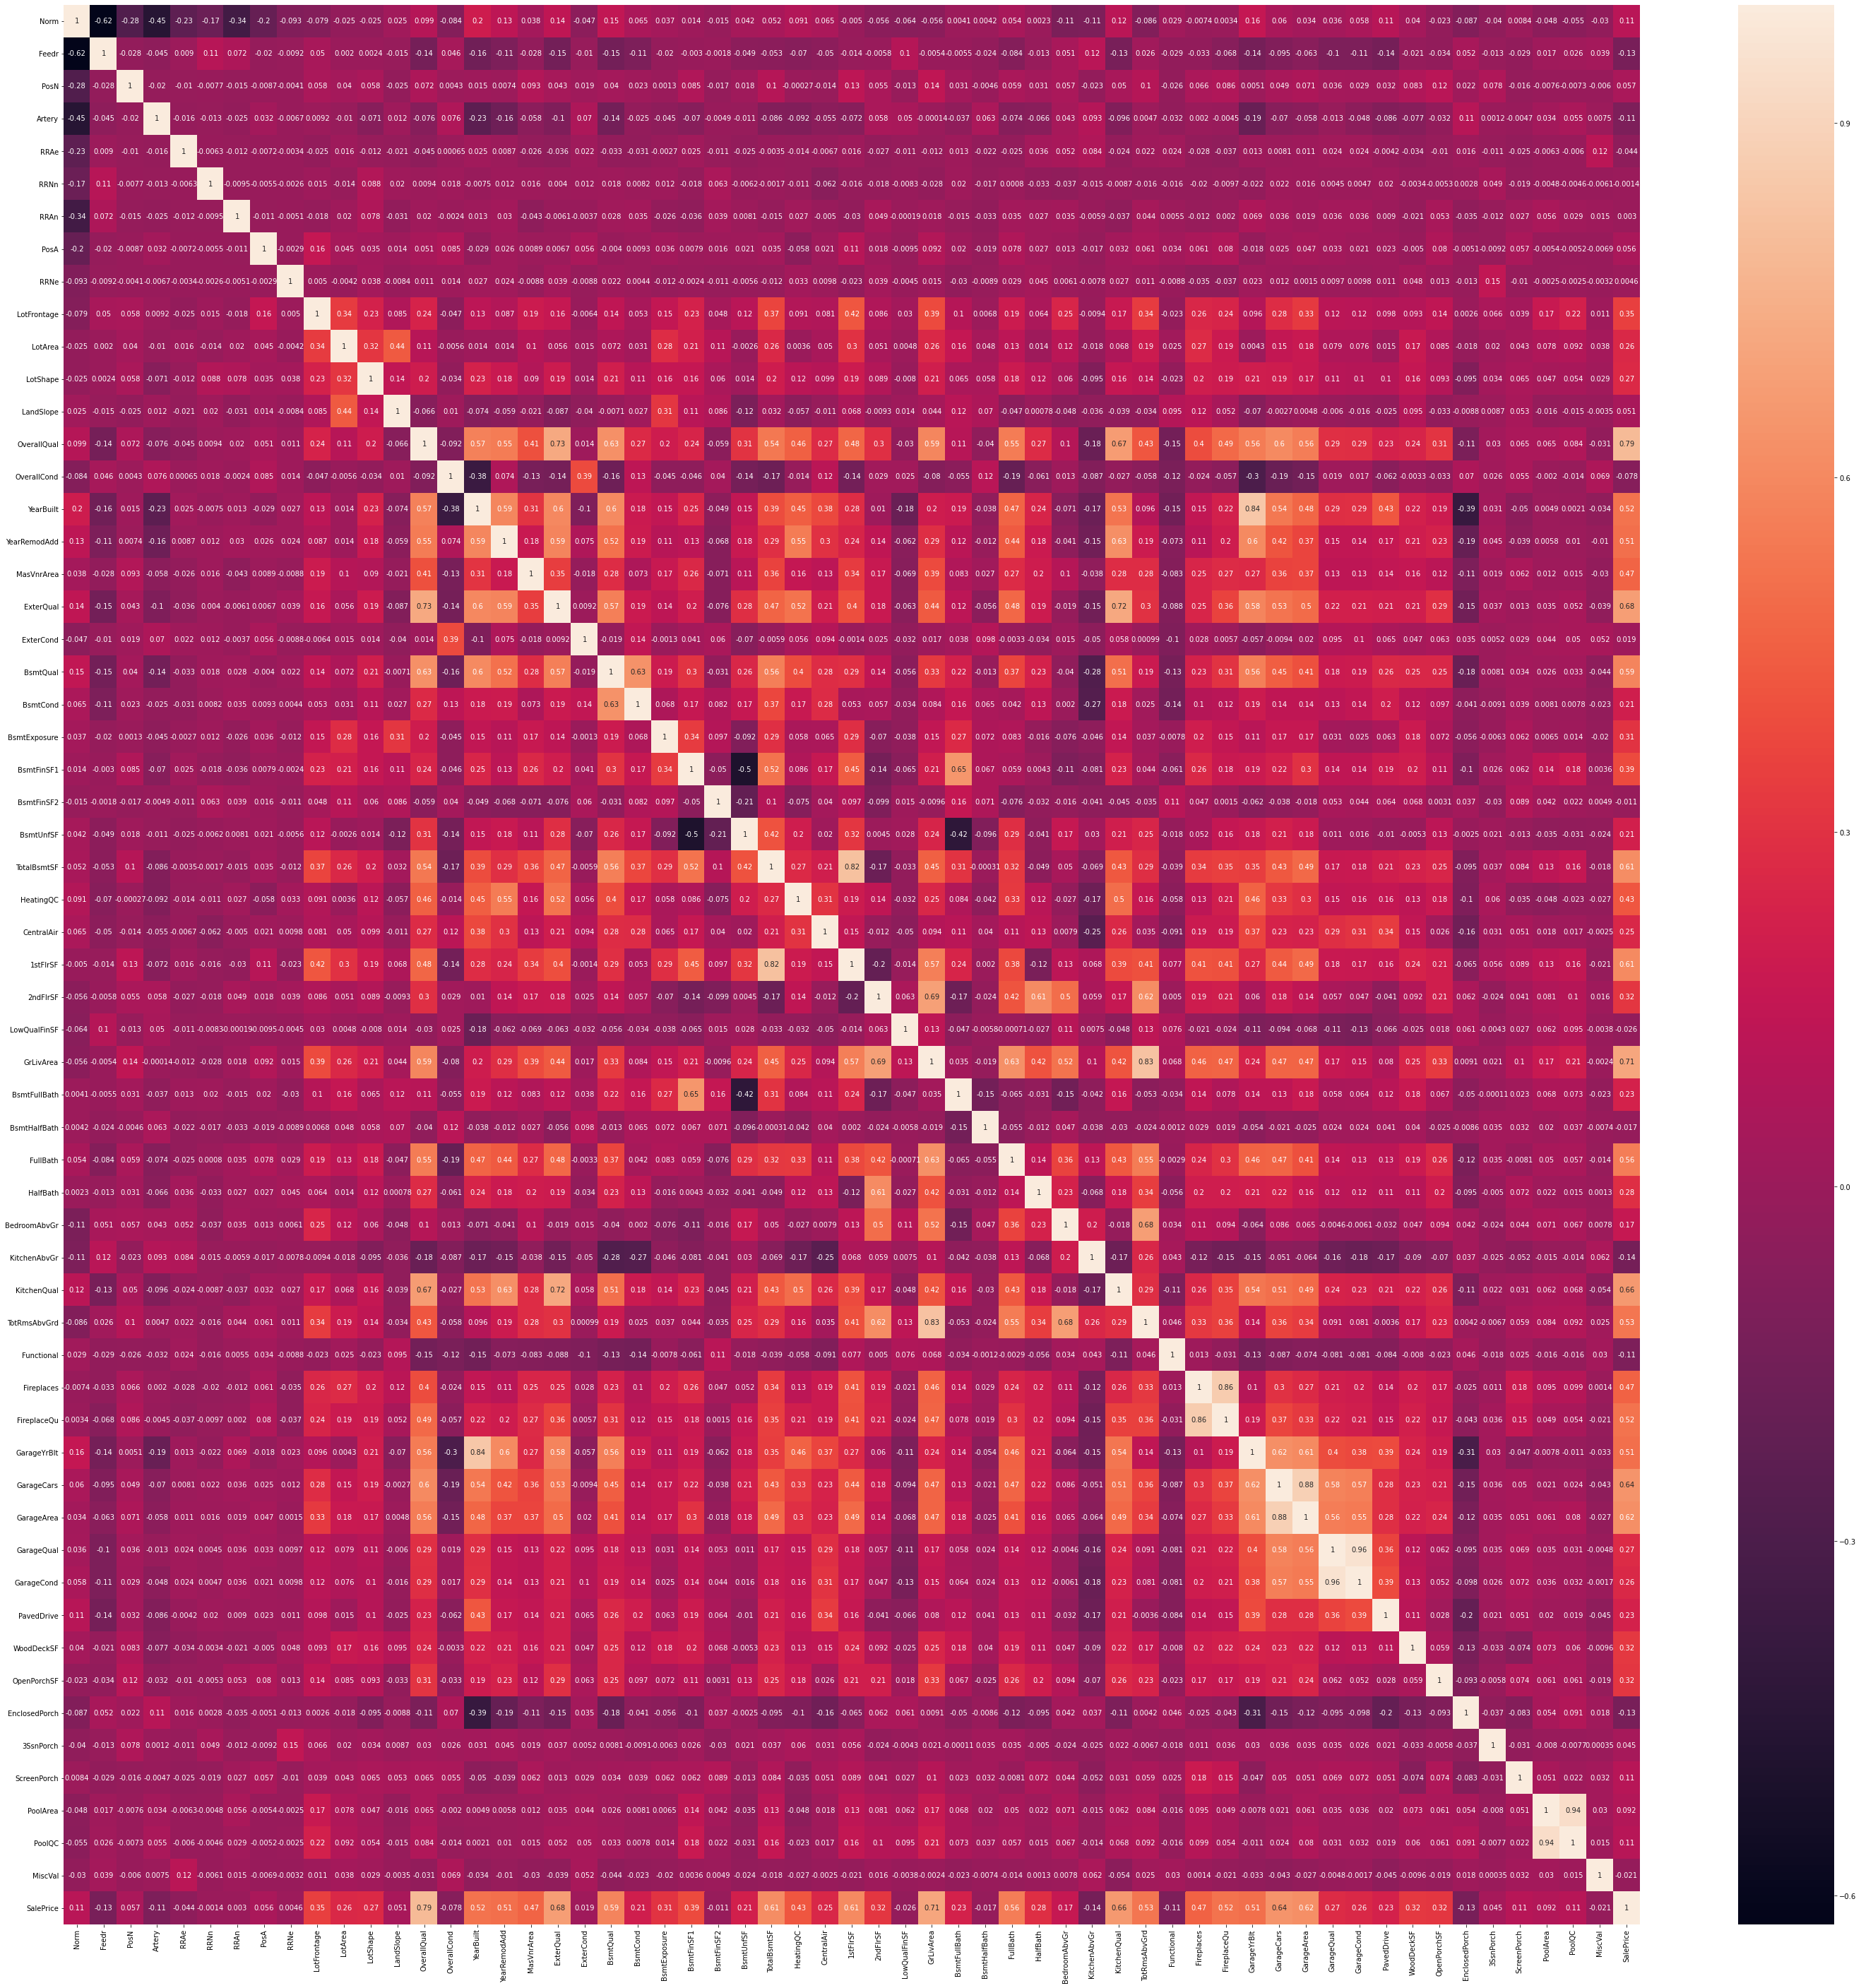

In [390]:
plt.figure(figsize=(50,50))
sns.heatmap(df_train.corr(),annot=True)

There's a lot of intercorrelations going on, as expected with any data. Here's a few notable ones:
* GarageCond vs GarageQual
* GarageCars vs GarageArea
* FireplaceQual vs Fireplace

Like mentioned, this might or might not be important later, and we might or might not eliminate them, but this information is important to be aware of. Next, we'll take a look at the categorical variables.